In [1]:
from matplotlib.colors import LogNorm
from bs4 import BeautifulSoup
from datetime import time
from datetime import datetime
from datetime import timedelta
from collections import Counter
import json
import requests
import csv
import pandas as pd
import numpy as np
import aiohttp
import asyncio
import concurrent.futures
import io
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_hist_gradient_boosting  # Enable experimental module
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import plot_importance
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegressionCV
import folium
import geopandas as gpd
from shapely.geometry import Point
from matplotlib.colors import Normalize
from matplotlib import cm

/Users/cdmoseley/anaconda3/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [15]:
CrossFit_Men = pd.read_csv('/Users/cdmoseley/dai_files/Capstone/Galvanize_Capstone_Crossfit/Data/Analysis_Data/Crossfit_Men.csv')
CrossFit_Men.head()

/var/folders/xm/kc32pwjj5fj5xqf43yb4dz340000gn/T/ipykernel_89055/3804685217.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  CrossFit_Men = pd.read_csv('/Users/cdmoseley/dai_files/Capstone/Galvanize_Capstone_Crossfit/Data/Analysis_Data/Crossfit_Men.csv')


,Athlete ID,Gender,Competitor Name,Country Name,Region Name,Affiliate Name,Height (in),Age (Years),Weight (lbs),Overall Rank,...,Grace (time),Grace (sec),Helen (time),Helen (sec),L1 Benchmark (time),L1 Benchmark (sec),Run 5k (time),Run 5k (sec),Sprint 400m (time),Sprint 400m (sec)
0,10942,M,Everett Sloan,Canada,North America East,CrossFit Bytown,67.0,45.0,200.0,68985.0,...,1:47,107.0,7:13,433.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10926,M,Kevin Wood,Canada,North America East,CrossFit Moncton,75.0,43.0,196.0,35977.0,...,3:13,193.0,8:16,496.0,NaN,NaN,19:38,1178.0,1:00,60.0
2,10976,M,John Lazaro,United States,North America East,CrossFit Bridgewater,69.0,46.0,180.0,164180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10977,M,Matthew Haynes,United States,North America West,CrossFit Westwood,71.0,31.0,180.0,165637.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10966,M,Nick DiMatteo,United States,North America East,CrossFit OTG,68.0,48.0,165.0,60027.0,...,NaN,NaN,9:01,541.0,NaN,NaN,21:55,1315.0,NaN,NaN


In [16]:
CrossFit_Women = pd.read_csv('/Users/cdmoseley/dai_files/Capstone/Galvanize_Capstone_Crossfit/Data/Analysis_Data/Crossfit_Women.csv')
CrossFit_Women.head()

/var/folders/xm/kc32pwjj5fj5xqf43yb4dz340000gn/T/ipykernel_89055/3063921178.py:1: DtypeWarning: Columns (0,40) have mixed types. Specify dtype option on import or set low_memory=False.
  CrossFit_Women = pd.read_csv('/Users/cdmoseley/dai_files/Capstone/Galvanize_Capstone_Crossfit/Data/Analysis_Data/Crossfit_Women.csv')


,Athlete ID,Gender,Competitor Name,Country Name,Region Name,Affiliate Name,Height (in),Age (Years),Weight (lbs),Overall Rank,...,Grace (time),Grace (sec),Helen (time),Helen (sec),L1 Benchmark (time),L1 Benchmark (sec),Run 5k (time),Run 5k (sec),Sprint 400m (time),Sprint 400m (sec)
0,1775.0,F,Daniella Verhoest,United States,North America East,CrossFit 908,62.0,35.0,145.0,6060.0,...,1:54,114.0,10:22,622.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1755.0,F,Robin Warnick,United States,North America East,CrossFit Terminus,66.0,47.0,145.0,70388.0,...,2:25,145.0,11:09,669.0,NaN,NaN,25:08,1508.0,1:20,80.0
2,1802.0,F,Melissa Kiel,United States,North America East,East Ormond Beach CrossFit,69.0,42.0,165.0,37421.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:23,83.0
3,1751.0,F,Philippa Robinson,Australia,Oceania,Ocean Fitness CrossFit,68.0,41.0,216.0,35925.0,...,1:52,112.0,9:11,551.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1659.0,F,Camas Barkemeyer,United States,North America West,CrossFit Kodiak Island,68.0,42.0,150.0,3944.0,...,NaN,NaN,NaN,NaN,NaN,NaN,23:51,1431.0,1:00,60.0


In [17]:
# Concatenate the two DataFrames vertically
CrossFit = pd.concat([CrossFit_Men, CrossFit_Women], ignore_index=True)
CrossFit.head()

,Athlete ID,Gender,Competitor Name,Country Name,Region Name,Affiliate Name,Height (in),Age (Years),Weight (lbs),Overall Rank,...,Grace (time),Grace (sec),Helen (time),Helen (sec),L1 Benchmark (time),L1 Benchmark (sec),Run 5k (time),Run 5k (sec),Sprint 400m (time),Sprint 400m (sec)
0,10942,M,Everett Sloan,Canada,North America East,CrossFit Bytown,67.0,45.0,200.0,68985.0,...,1:47,107.0,7:13,433.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10926,M,Kevin Wood,Canada,North America East,CrossFit Moncton,75.0,43.0,196.0,35977.0,...,3:13,193.0,8:16,496.0,NaN,NaN,19:38,1178.0,1:00,60.0
2,10976,M,John Lazaro,United States,North America East,CrossFit Bridgewater,69.0,46.0,180.0,164180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10977,M,Matthew Haynes,United States,North America West,CrossFit Westwood,71.0,31.0,180.0,165637.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10966,M,Nick DiMatteo,United States,North America East,CrossFit OTG,68.0,48.0,165.0,60027.0,...,NaN,NaN,9:01,541.0,NaN,NaN,21:55,1315.0,NaN,NaN


In [18]:
# Calculate BMI
CrossFit['BMI'] = (CrossFit['Weight (lbs)'] / (CrossFit['Height (in)'] ** 2)) * 703

# Remove the "BMI" column
bmi_column = CrossFit.pop('BMI')

# Find the index of the "Weight (lbs)" column
weight_index = CrossFit.columns.get_loc('Weight (lbs)')

# Insert the "BMI" column after the "Weight (lbs)" column
CrossFit.insert(weight_index + 1, 'BMI', bmi_column)

# Display the DataFrame with the updated column order
CrossFit.head()

,Athlete ID,Gender,Competitor Name,Country Name,Region Name,Affiliate Name,Height (in),Age (Years),Weight (lbs),BMI,...,Grace (time),Grace (sec),Helen (time),Helen (sec),L1 Benchmark (time),L1 Benchmark (sec),Run 5k (time),Run 5k (sec),Sprint 400m (time),Sprint 400m (sec)
0,10942,M,Everett Sloan,Canada,North America East,CrossFit Bytown,67.0,45.0,200.0,31.321007,...,1:47,107.0,7:13,433.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10926,M,Kevin Wood,Canada,North America East,CrossFit Moncton,75.0,43.0,196.0,24.495644,...,3:13,193.0,8:16,496.0,NaN,NaN,19:38,1178.0,1:00,60.0
2,10976,M,John Lazaro,United States,North America East,CrossFit Bridgewater,69.0,46.0,180.0,26.578450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10977,M,Matthew Haynes,United States,North America West,CrossFit Westwood,71.0,31.0,180.0,25.102162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10966,M,Nick DiMatteo,United States,North America East,CrossFit OTG,68.0,48.0,165.0,25.085424,...,NaN,NaN,9:01,541.0,NaN,NaN,21:55,1315.0,NaN,NaN


In [32]:
CrossFit_Men['Top 25%'] = CrossFit_Men['Overall Rank'].apply(lambda x: 1 if x < 41409 else 0)

In [5]:
locations = pd.read_csv('/Users/cdmoseley/dai_files/Capstone/Galvanize_Capstone_Crossfit/Data/crossfit-locations-in-united-states.csv')
locations.head()

,name,address,city,state,zip,country,phone,lat,lng,url
0,CrossFit Dubuque,"3080 Cedar Crest Court, Suite 102",Dubuque,IOWA,52003,UNITED STATES OF AMERICA,563-279-4652,42.478460,-90.706780,http://crossfitdubuque.com/
1,Ballston CrossFit,1110 North Glebe Rd,Arlington,VIRGINIA,22201,UNITED STATES OF AMERICA,7036882238,38.883750,-77.117243,http://www.ballstoncrossfit.com/
2,CrossFit Bartlesville,3822 SE Kentucky Suite 13-14,Bartlesville,OKLAHOMA,74006,UNITED STATES OF AMERICA,9183500120,36.755246,-95.935482,http://www.crossfitbartlesville.com
3,Armor CrossFit,535 Cooper Commerce Drive,Apopka,FLORIDA,32703,UNITED STATES OF AMERICA,407 704 9532,28.668250,-81.523160,http://www.armorcrossfit.com/
4,CrossFit 5150,1480 E 28th St,Signal Hill,CALIFORNIA,90755,UNITED STATES OF AMERICA,5629000493,33.808032,-118.173310,http://www.crossfit5150.com


In [9]:
merged_df = pd.merge(CrossFit, locations, left_on='Affiliate Name', right_on='name', how='left')
merged_df.head()

,Athlete ID,Gender,Competitor Name,Country Name,Region Name,Affiliate Name,Height (in),Age (Years),Weight (lbs),Overall Rank,...,name,address,city,state,zip,country,phone,lat,lng,url
0,10942,M,Everett Sloan,Canada,North America East,CrossFit Bytown,67.0,45.0,200.0,68985.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10926,M,Kevin Wood,Canada,North America East,CrossFit Moncton,75.0,43.0,196.0,35977.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10976,M,John Lazaro,United States,North America East,CrossFit Bridgewater,69.0,46.0,180.0,164180.0,...,CrossFit Bridgewater,620 Bedford Street,Bridgewater,MASSACHUSETTS,02324,UNITED STATES OF AMERICA,5085056643,41.971565,-70.974321,https://crossfitbridgewater.com/
3,10977,M,Matthew Haynes,United States,North America West,CrossFit Westwood,71.0,31.0,180.0,165637.0,...,CrossFit Westwood,608 S Jennings Ave,Fort Worth,TEXAS,76104,UNITED STATES OF AMERICA,9562171838,32.737951,-97.330469,http://crossfitwestwood.com/
4,10966,M,Nick DiMatteo,United States,North America East,CrossFit OTG,68.0,48.0,165.0,60027.0,...,CrossFit OTG,3330 Bargaintown Rd,Egg Harbor Township,NEW JERSEY,08234,UNITED STATES OF AMERICA,6095139164,39.374345,-74.580953,http://www.crossfitotg.com/


In [13]:
# Interactive html for Crossfit Affiliates 
locations_df = merged_df.dropna(subset=['lat', 'lng'])
unique_locations_df = locations_df.drop_duplicates(subset=['lat', 'lng'])

# Group by location and gender to calculate counts and average overall rank
grouped_df = merged_df.groupby(['lat', 'lng', 'Gender']).agg({
    'Competitor Name': 'count',
    'Overall Rank': 'mean',
    'Age (Years)': 'mean',
    'Back Squat (lbs)': 'mean',
    'Deadlift (lbs)': 'mean',
    'Clean and Jerk (lbs)': 'mean',
    'Snatch (lbs)': 'mean'
}).reset_index()

# Create a map centered on the US
map_us = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers for each unique CrossFit affiliate location
for index, row in unique_locations_df.iterrows():
    lat, lng = row['lat'], row['lng']
    popup_content = f"<b>{row['name']}</b><br>"
    
    # Find statistics for men and women at this location
    for gender in ['M', 'F']:
        gender_info = grouped_df[(grouped_df['lat'] == lat) & (grouped_df['lng'] == lng) & (grouped_df['Gender'] == gender)]
        if not gender_info.empty:
            count = gender_info.iloc[0]['Competitor Name']
            avg_rank = gender_info.iloc[0]['Overall Rank']
            avg_age = gender_info.iloc[0]['Age (Years)']
            avg_back_squat = gender_info.iloc[0]['Back Squat (lbs)']
            avg_deadlift = gender_info.iloc[0]['Deadlift (lbs)']
            avg_clean_jerk = gender_info.iloc[0]['Clean and Jerk (lbs)']
            avg_snatch = gender_info.iloc[0]['Snatch (lbs)']
            popup_content += f"<br><b>{'Men' if gender == 'M' else 'Women'}</b>: {count} athletes<br><b>Avg. Overall Rank:</b> {avg_rank:.2f}<br>"
            popup_content += f"<b>Avg. Age:</b> {avg_age:.2f} yrs<br>"
            popup_content += f"<b>Avg. Back Squat:</b> {avg_back_squat:.2f} lbs<br>"
            popup_content += f"<b>Avg. Deadlift:</b> {avg_deadlift:.2f} lbs<br>"
            popup_content += f"<b>Avg. Clean and Jerk:</b> {avg_clean_jerk:.2f} lbs<br>"
            popup_content += f"<b>Avg. Snatch:</b> {avg_snatch:.2f} lbs<br>"
    
    folium.Marker(
        location=[lat, lng],
        popup=folium.Popup(popup_content, max_width=400),
    ).add_to(map_us)

# Display the map
map_us.save('crossfit_affiliates_with_stats_bold.html')

In [24]:
# Age, Gender, and Weight Stats 
summary_df = CrossFit[['Gender', 'Age (Years)', 'Weight (lbs)', 'Height (in)', 'BMI']]

grouped = summary_df.groupby('Gender')

age_stats = grouped['Age (Years)'].describe()
weight_stats = grouped['Weight (lbs)'].describe()
height_stats = grouped['Height (in)'].describe()
bmi_stats = grouped['BMI'].describe()

# Custom function to format the statistics with commas for thousands separators
def format_with_commas(x):
    if isinstance(x, (int, float)):
        return "{:,.0f}".format(x)
    else:
        return x

age_stats = age_stats.applymap(format_with_commas)
weight_stats = weight_stats.applymap(format_with_commas)
height_stats = height_stats.applymap(format_with_commas)
bmi_stats = bmi_stats.applymap(format_with_commas)

age_stats = age_stats.rename(index={'count': '', 'mean': 'count'}, inplace=False)
weight_stats = weight_stats.rename(index={'count': '', 'mean': 'count'}, inplace=False)
height_stats = height_stats.rename(index={'count': '', 'mean': 'count'}, inplace=False)
bmi_stats = bmi_stats.rename(index={'count': '', 'mean': 'count'}, inplace=False)

In [20]:
age_stats.head()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,"124,927",35,8,16,29,34,41,54
M,"176,254",36,8,16,30,35,41,54


In [25]:
weight_stats.head()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,"42,627",142,22,50,130,140,154,408
M,"89,450",187,27,54,170,185,201,525


In [26]:
height_stats.head()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,"47,057",65,3,48,63,65,67,77
M,"89,673",70,3,50,69,70,72,82


In [27]:
bmi_stats.head()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,"39,780",24,3,7,22,23,25,71
M,"85,729",27,3,8,25,26,28,94


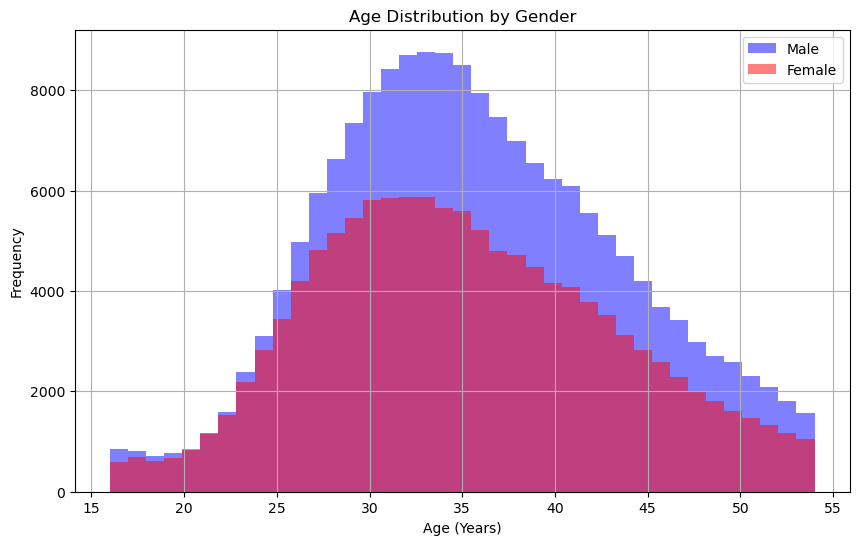

In [28]:
# Plotting histograms for Age comparing male and female
plt.figure(figsize=(10, 6))
plt.hist(CrossFit[CrossFit['Gender'] == 'M']['Age (Years)'], bins=39, alpha=0.5, label='Male', color='blue')
plt.hist(CrossFit[CrossFit['Gender'] == 'F']['Age (Years)'], bins=39, alpha=0.5, label='Female', color='red')
plt.title('Age Distribution by Gender')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

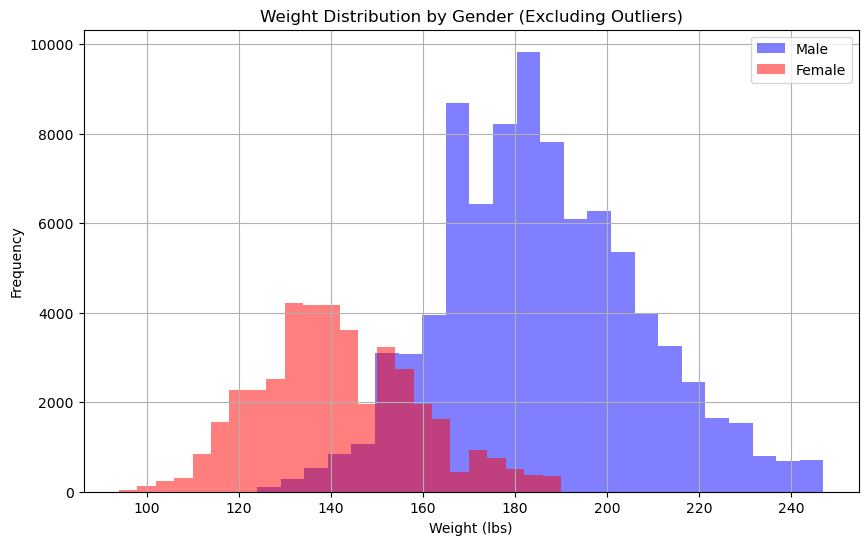

In [29]:
# Plotting histograms removing outlieres for weight 
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Remove outliers for male and female weight data
male_weight_no_outliers = remove_outliers_iqr(CrossFit[CrossFit['Gender'] == 'M']['Weight (lbs)'])
female_weight_no_outliers = remove_outliers_iqr(CrossFit[CrossFit['Gender'] == 'F']['Weight (lbs)'])

# Plotting histograms for Weight comparing male and female without outliers
plt.figure(figsize=(10, 6))
plt.hist(male_weight_no_outliers, bins=24, alpha=0.5, label='Male', color='blue')
plt.hist(female_weight_no_outliers, bins=24, alpha=0.5, label='Female', color='red')
plt.title('Weight Distribution by Gender (Excluding Outliers)')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

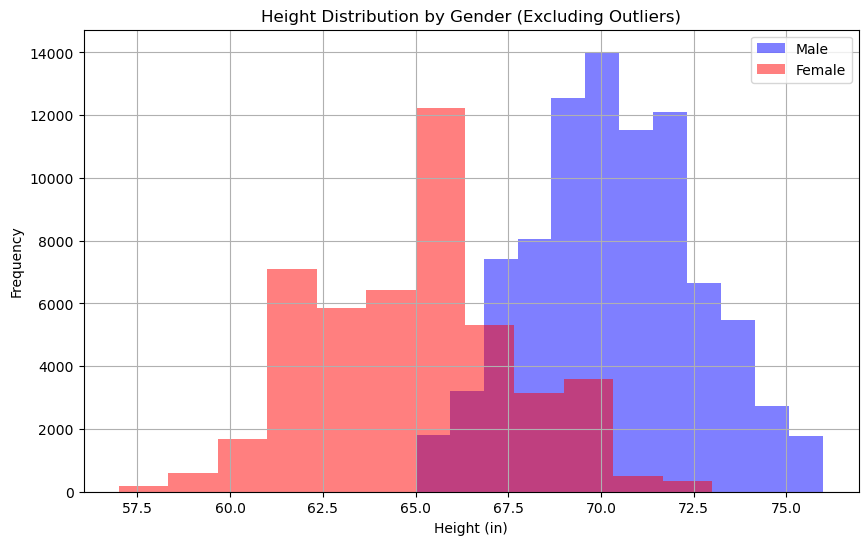

In [30]:
# Histograms for Height 
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Remove outliers for male and female height data
male_height_no_outliers = remove_outliers_iqr(CrossFit[CrossFit['Gender'] == 'M']['Height (in)'])
female_height_no_outliers = remove_outliers_iqr(CrossFit[CrossFit['Gender'] == 'F']['Height (in)'])

# Plotting histograms for Height comparing male and female without outliers
plt.figure(figsize=(10, 6))
plt.hist(male_height_no_outliers, bins=12, alpha=0.5, label='Male', color='blue')
plt.hist(female_height_no_outliers, bins=12, alpha=0.5, label='Female', color='red')
plt.title('Height Distribution by Gender (Excluding Outliers)')
plt.xlabel('Height (in)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

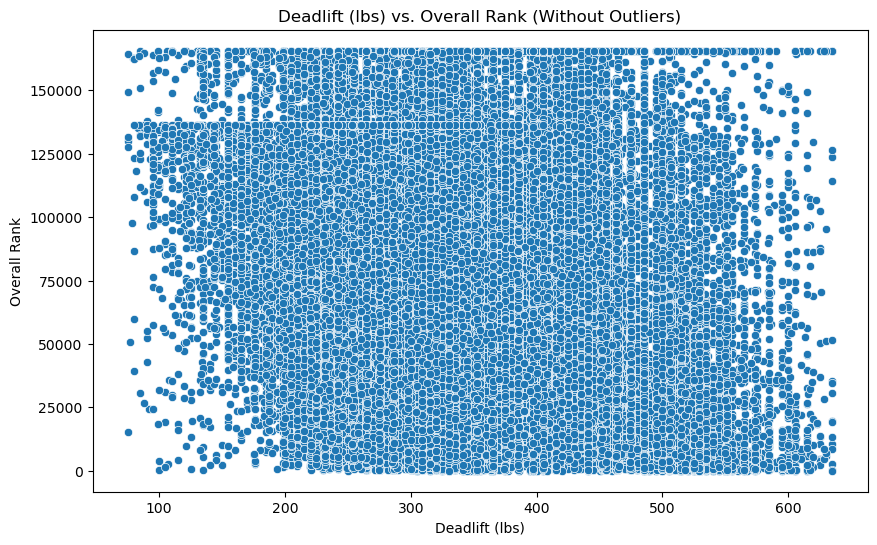

Correlation between Deadlift (lbs) and 'Overall Rank' after removing outliers: -0.18658666013819453


In [31]:
# EDA
Q1 = CrossFit['Deadlift (lbs)'].quantile(0.25)
Q3 = CrossFit['Deadlift (lbs)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
CrossFit_filtered = CrossFit[(CrossFit['Deadlift (lbs)'] >= lower_bound) & (CrossFit['Deadlift (lbs)'] <= upper_bound)]

# Visualize the relationship between 'Deadlift (lbs)' and 'Overall Rank' without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Deadlift (lbs)', y='Overall Rank', data=CrossFit_filtered)
plt.title('Deadlift (lbs) vs. Overall Rank (Without Outliers)')
plt.xlabel('Deadlift (lbs)')
plt.ylabel('Overall Rank')
plt.show()

# Calculate correlation coefficient between 'Deadlift (lbs)' and 'Overall Rank' after removing outliers
correlation = CrossFit_filtered['Deadlift (lbs)'].corr(CrossFit_filtered['Overall Rank'])
print("Correlation between Deadlift (lbs) and 'Overall Rank' after removing outliers:", correlation)

In [84]:
# Logistic Regression Test looking at chances of making it to QuarterFinals 
X = CrossFit_Men[['Back Squat (lbs)', 'Deadlift (lbs)', 'Clean and Jerk (lbs)', 
                  'Snatch (lbs)', 'Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                  'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 'Run 5k (sec)', 
                  'Sprint 400m (sec)']]
y = CrossFit_Men['Top 25%']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

train_accuracy = logreg.score(X_train_scaled, y_train)
test_accuracy = logreg.score(X_test_scaled, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.7996851242482697
Testing Accuracy: 0.8010892998978781


In [76]:
# Standardizing the input values
input_values = [[329, 405.0, 236.0, 180.0, 305.0, 1553, 275.0, 198.0, 613.0, 1417, 75.0]]  # Input values as a list of lists
input_values_scaled = scaler.transform(input_values)

# Predicting the probability of being in the top 25%
predicted_probability = logreg.predict_proba(input_values_scaled)[:, 1]  # Predicting probability of positive class

# Accessing the coefficients of the logistic regression model
coefficients = logreg.coef_[0]

print("Predicted Probability of Being in Top 25%:", predicted_probability[0])
print("Coefficients:")
for feature, coefficient in zip(X.columns, coefficients):
    print(f"{feature}: {coefficient}")

Predicted Probability of Being in Top 25%: 0.21712389631660436
Coefficients:
Back Squat (lbs): -0.07535974887986213
Deadlift (lbs): 0.15534472604308394
Clean and Jerk (lbs): 0.36549403287441573
Snatch (lbs): 0.30663007797709874
Fight Gone Bad (# reps): -0.01688037486217646
Filthy 50 (sec): -0.006062701727836242
Fran (sec): -0.4138685159583012
Grace (sec): 0.05012713430825563
Helen (sec): -0.14697237146700787
Run 5k (sec): -0.3130534127185408
Sprint 400m (sec): 0.013113584706554986


In [85]:
# Assuming CrossFit is a DataFrame with the categories as columns
categories = CrossFit[['Back Squat (lbs)', 'Deadlift (lbs)', 'Clean and Jerk (lbs)', 
                      'Snatch (lbs)', 'Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                      'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 'Run 5k (sec)', 
                      'Sprint 400m (sec)']]

# Remove rows with missing values
categories_cleaned = categories.dropna()

# Calculate the percentile value for each category
percentile_values = {}
for category in categories_cleaned.columns:
    values = categories_cleaned[category].tolist()
    if "(sec)" in category:
        percentile_value = np.percentile(values, 29)  # For (sec) variables, lower is better
    else:
        percentile_value = np.percentile(values, 71)  # For other variables, higher is better
    percentile_values[category] = percentile_value

# Convert the dictionary of percentile values to a list
input_values = [list(percentile_values.values())]

print("Input Values:", input_values)

input_values_scaled = scaler.transform(input_values)

# Predicting the probability of being in the top 25%
predicted_probability = logreg.predict_proba(input_values_scaled)[:, 1]  # Predicting probability of positive class

# Accessing the coefficients of the logistic regression model
coefficients = logreg.coef_[0]

print("Predicted Probability of Being in Top 25%:", predicted_probability[0])
print("Coefficients:")
for feature, coefficient in zip(X.columns, coefficients):
    print(f"{feature}: {coefficient}")

Input Values: [[375.0, 455.0, 265.0, 205.0, 353.03, 1296.0, 183.0, 135.0, 515.0, 1268.97, 65.0]]
Predicted Probability of Being in Top 25%: 0.7590044155763555
Coefficients:
Back Squat (lbs): -0.07535974887986213
Deadlift (lbs): 0.15534472604308394
Clean and Jerk (lbs): 0.36549403287441573
Snatch (lbs): 0.30663007797709874
Fight Gone Bad (# reps): -0.01688037486217646
Filthy 50 (sec): -0.006062701727836242
Fran (sec): -0.4138685159583012
Grace (sec): 0.05012713430825563
Helen (sec): -0.14697237146700787
Run 5k (sec): -0.3130534127185408
Sprint 400m (sec): 0.013113584706554986


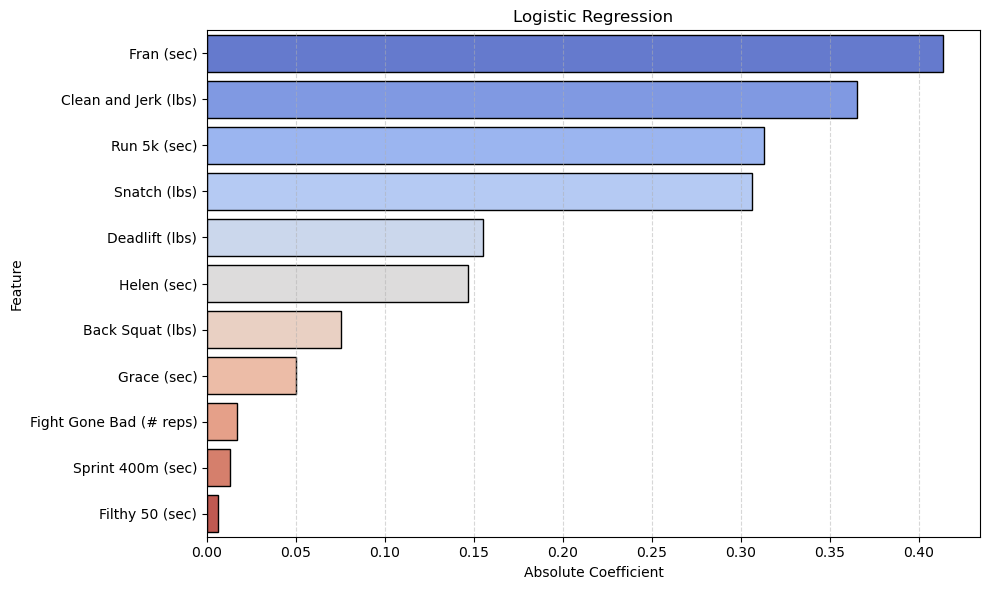

In [86]:
#Logistic Regression Coefficient Chart 
abs_coefficients = np.abs(coefficients)
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Absolute Coefficient': abs_coefficients})
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=coefficients_df, palette="coolwarm", edgecolor='black')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Logistic Regression')
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [87]:
# Extract coefficients and features
coefficients = logreg_model.coef_[0]
features = X.columns

# Calculate absolute coefficients
abs_coefficients = np.abs(coefficients)

# Sort coefficients and features by absolute coefficient value
sorted_indices = np.argsort(abs_coefficients)[::-1]
sorted_coefficients = abs_coefficients[sorted_indices]
sorted_features = np.array(features)[sorted_indices]

# Create a color palette
colors = sns.color_palette("coolwarm", len(sorted_coefficients))

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefficients, color=colors, edgecolor='black', alpha=0.7)
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

NameError: name 'logreg_model' is not defined

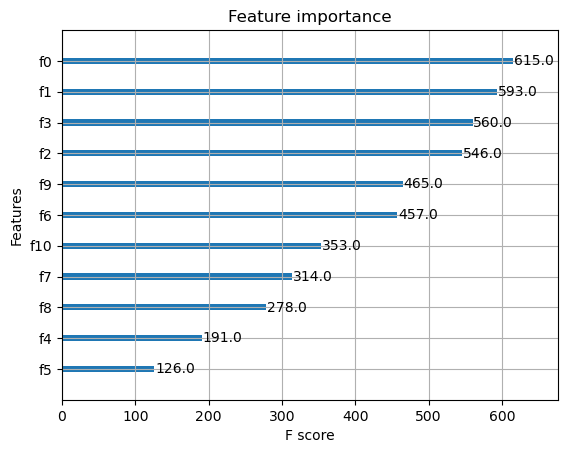

In [91]:
# XG Boost 
xgb_model = xgb.XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Plot feature importance
plot_importance(xgb_model)
plt.show()

In [94]:
# XG Boost Feature Importance Scores 
importance_scores = xgb_model.feature_importances_

# Create a dictionary to store feature names and their importance scores
feature_importance_dict = {}
for i in range(len(X.columns)):
    feature_importance_dict[X.columns[i]] = importance_scores[i]

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print out the top 10 features with their importance scores
print("Feature Importance:")
for i in range(11):
    feature_name, importance_score = sorted_feature_importance[i]
    print(f"{feature_name}: {importance_score}")

Feature Importance:
Snatch (lbs): 0.4057987928390503
Fran (sec): 0.15592917799949646
Clean and Jerk (lbs): 0.11585705727338791
Run 5k (sec): 0.06338374316692352
Helen (sec): 0.05122796446084976
Deadlift (lbs): 0.04706414043903351
Fight Gone Bad (# reps): 0.04052137956023216
Filthy 50 (sec): 0.035131413489580154
Back Squat (lbs): 0.0346897654235363
Grace (sec): 0.02620345912873745
Sprint 400m (sec): 0.024193041026592255


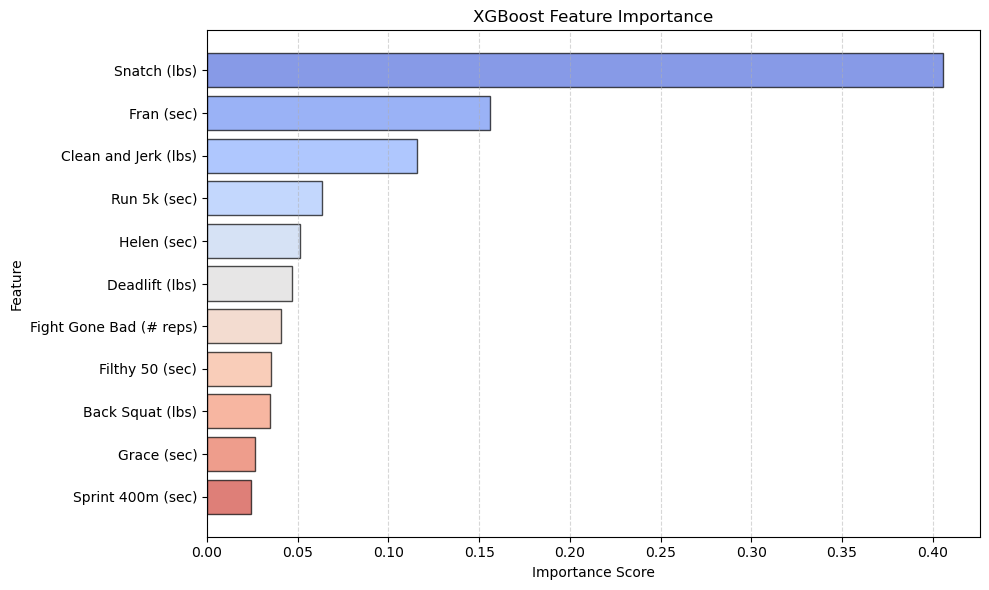

In [93]:
# XGBoost Feature Importance Chart 
top_features = [item[0] for item in sorted_feature_importance[:11]]
top_scores = [item[1] for item in sorted_feature_importance[:11]]

# Plot feature importance
plt.figure(figsize=(10, 6))
colors = sns.color_palette("coolwarm", len(top_features))  # Create a coolwarm color palette
plt.barh(top_features, top_scores, color=colors, edgecolor='black', alpha=0.7)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

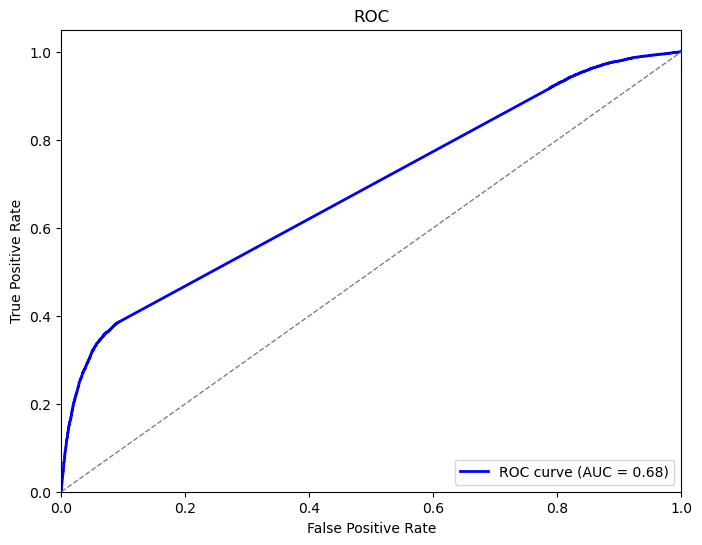

In [97]:
# Extracting feature variables and target variable
X = CrossFit_Men[['Back Squat (lbs)', 'Deadlift (lbs)', 'Clean and Jerk (lbs)', 
                  'Snatch (lbs)', 'Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                  'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 'Run 5k (sec)', 
                  'Sprint 400m (sec)']]
y = CrossFit_Men['Top 25%']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean of each feature
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fitting a logistic regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logreg_model.fit(X_train_imputed, y_train)

# Predicting probabilities on the testing set
y_pred_proba = logreg_model.predict_proba(X_test_imputed)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [98]:
# Fitting a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed, y_train)

# Predicting on the testing set
y_pred_rf = rf_model.predict(X_test_imputed)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.802706229433791

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88     27079
           1       0.67      0.30      0.41      8173

    accuracy                           0.80     35252
   macro avg       0.74      0.63      0.65     35252
weighted avg       0.78      0.80      0.77     35252



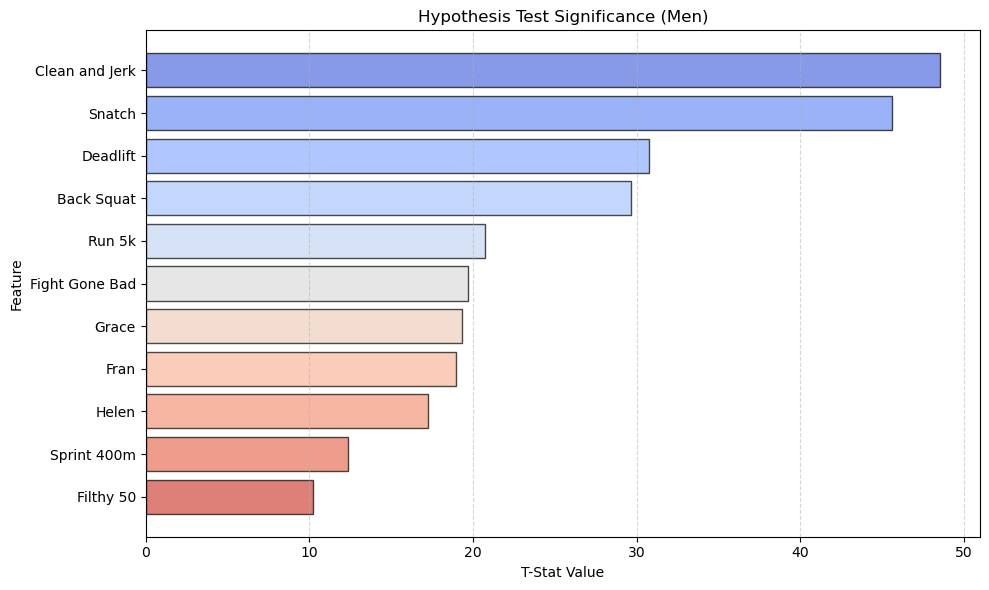

In [99]:
# Hypothesis Test Chart 
t_stat_values = [48.55, 45.6, 19.7, 29.67, 30.74, 10.22, 12.39, 19.32, 17.26, 20.75, 18.94]
features = ['Clean and Jerk', 'Snatch', 'Fight Gone Bad', 'Back Squat', 'Deadlift', 'Filthy 50', 'Sprint 400m', 'Grace', 'Helen', 'Run 5k', 'Fran']
# Sort features and t-stat values by absolute t-statistic value
sorted_indices = sorted(range(len(t_stat_values)), key=lambda i: abs(t_stat_values[i]), reverse=True)
sorted_features = [features[i] for i in sorted_indices]
sorted_t_stat_values = [t_stat_values[i] for i in sorted_indices]

# Create a color palette
colors = sns.color_palette("coolwarm", len(t_stat_values))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_t_stat_values, color=colors, edgecolor='black', alpha=0.7)
plt.xlabel('T-Stat Value')
plt.ylabel('Feature')
plt.title('Hypothesis Test Significance (Men)')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)  # Add vertical line at zero for reference
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add gridlines for better readability
plt.gca().invert_yaxis()  # Invert y-axis to show features with higher values on top
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
plt.show()

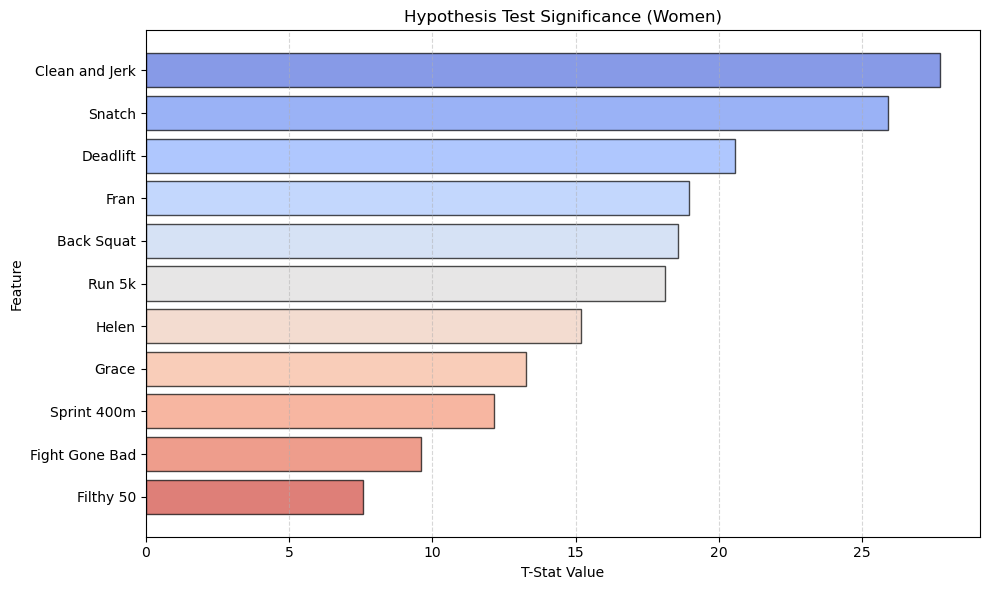

In [ ]:
# Hypothesis Test Chart 
t_stat_values = [25.88, 27.72, 18.58, 20.57, 7.57, 9.6, 12.16, 15.177, 13.28, 18.94, 18.13]
features = ['Snatch', 'Clean and Jerk', 'Back Squat', 'Deadlift', 'Filthy 50', 'Fight Gone Bad', 'Sprint 400m', 'Helen', 'Grace', 'Fran', 'Run 5k']
# Sort features and t-stat values by absolute t-statistic value
sorted_indices = sorted(range(len(t_stat_values)), key=lambda i: abs(t_stat_values[i]), reverse=True)
sorted_features = [features[i] for i in sorted_indices]
sorted_t_stat_values = [t_stat_values[i] for i in sorted_indices]

# Create a color palette
colors = sns.color_palette("coolwarm", len(t_stat_values))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_t_stat_values, color=colors, edgecolor='black', alpha=0.7)
plt.xlabel('T-Stat Value')
plt.ylabel('Feature')
plt.title('Hypothesis Test Significance (Women)')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)  # Add vertical line at zero for reference
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add gridlines for better readability
plt.gca().invert_yaxis()  # Invert y-axis to show features with higher values on top
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
plt.show()

/var/folders/xm/kc32pwjj5fj5xqf43yb4dz340000gn/T/ipykernel_89055/4056846183.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group_df['BMI'] = (age_group_df['Weight (lbs)'] / (age_group_df['Height (in)'] ** 2)) * 703
/var/folders/xm/kc32pwjj5fj5xqf43yb4dz340000gn/T/ipykernel_89055/4056846183.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group_df['BMI'] = (age_group_df['Weight (lbs)'] / (age_group_df['Height (in)'] ** 2)) * 703
/var/folders/xm/kc32pwjj5fj5xqf43yb4dz340000gn/T/ipykernel_890

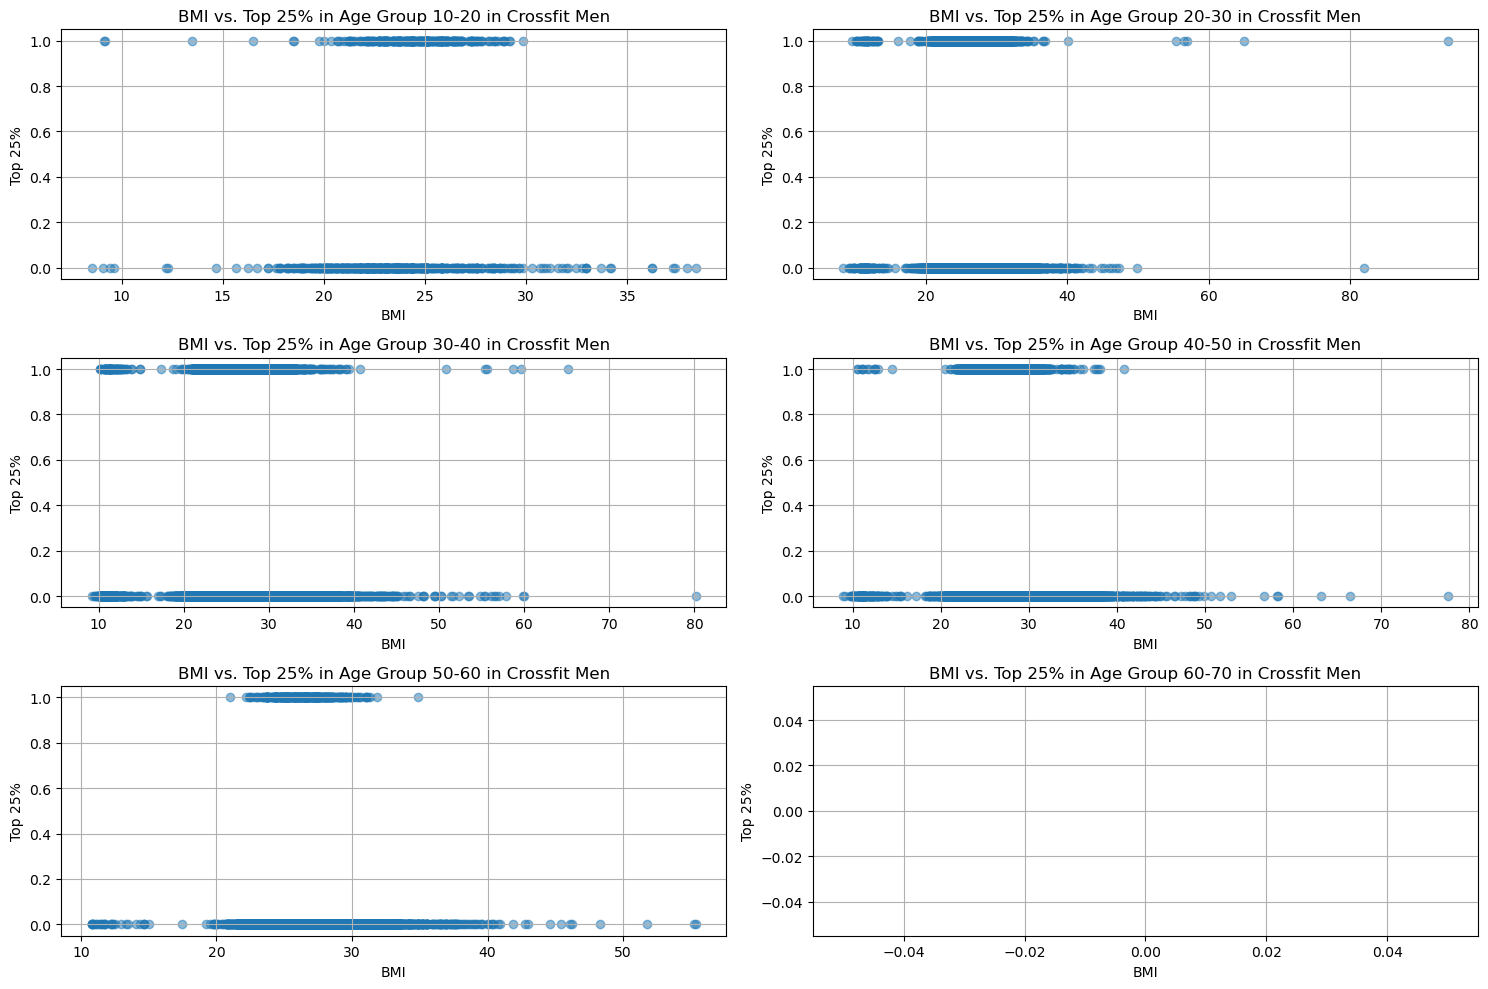

In [101]:
# Define age group ranges
age_groups = [(10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70)]

# Plot BMI vs. Top 25% for each age group
plt.figure(figsize=(15, 10))

for i, (start_age, end_age) in enumerate(age_groups, start=1):
    # Filter dataframe for the current age group
    age_group_df = CrossFit_Men[(CrossFit_Men['Age (Years)'] >= start_age) & (Crossfit_Men['Age (Years)'] < end_age)]
    
    # Calculate BMI
    age_group_df['BMI'] = (age_group_df['Weight (lbs)'] / (age_group_df['Height (in)'] ** 2)) * 703
    
    # Create subplot
    plt.subplot(3, 2, i)
    
    # Scatter plot for the current age group
    plt.scatter(age_group_df['BMI'], age_group_df['Top 25%'], alpha=0.5)
    plt.xlabel('BMI')
    plt.ylabel('Top 25%')
    plt.title(f'BMI vs. Top 25% in Age Group {start_age}-{end_age} in Crossfit Men')
    plt.grid(True)

plt.tight_layout()
plt.show()

/var/folders/xm/kc32pwjj5fj5xqf43yb4dz340000gn/T/ipykernel_89055/2808221608.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group_df['BMI'] = (age_group_df['Weight (lbs)'] / (age_group_df['Height (in)'] ** 2)) * 703
/var/folders/xm/kc32pwjj5fj5xqf43yb4dz340000gn/T/ipykernel_89055/2808221608.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group_df['BMI'] = (age_group_df['Weight (lbs)'] / (age_group_df['Height (in)'] ** 2)) * 703
/var/folders/xm/kc32pwjj5fj5xqf43yb4dz340000gn/T/ipykernel_890

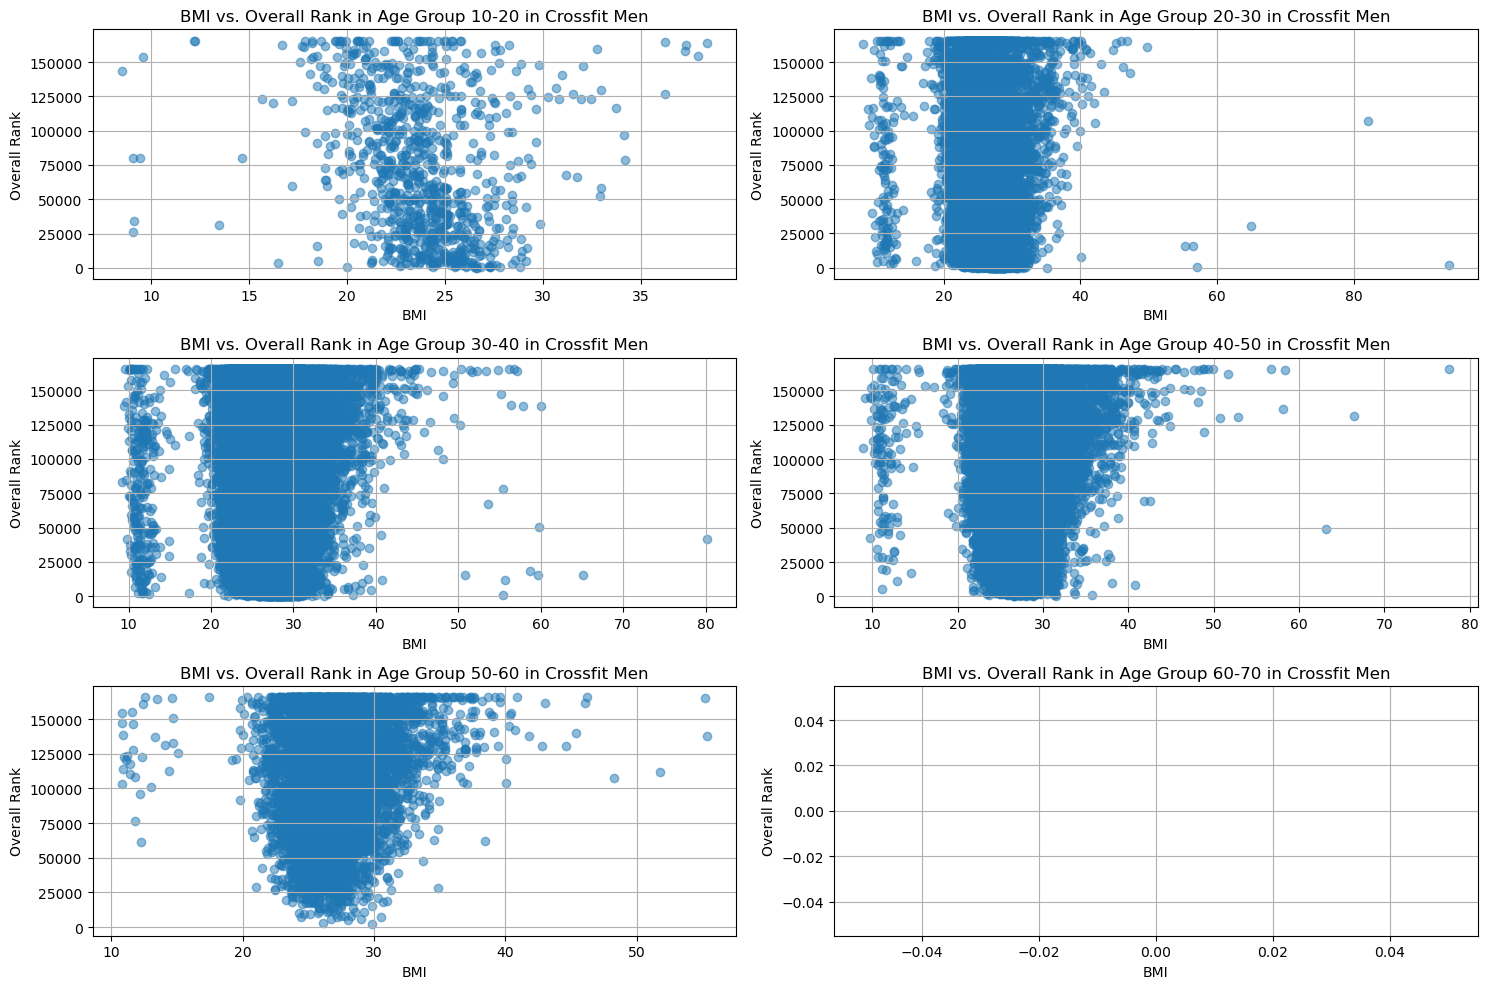

In [102]:
# Define age group ranges
age_groups = [(10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70)]

# Plot BMI vs. Overall Rank for each age group
plt.figure(figsize=(15, 10))

for i, (start_age, end_age) in enumerate(age_groups, start=1):
    # Filter dataframe for the current age group
    age_group_df = CrossFit_Men[(CrossFit_Men['Age (Years)'] >= start_age) & (Crossfit_Men['Age (Years)'] < end_age)]
    
    # Calculate BMI
    age_group_df['BMI'] = (age_group_df['Weight (lbs)'] / (age_group_df['Height (in)'] ** 2)) * 703
    
    # Create subplot
    plt.subplot(3, 2, i)
    
    # Scatter plot for the current age group
    plt.scatter(age_group_df['BMI'], age_group_df['Overall Rank'], alpha=0.5)
    plt.xlabel('BMI')
    plt.ylabel('Overall Rank')
    plt.title(f'BMI vs. Overall Rank in Age Group {start_age}-{end_age} in Crossfit Men')
    plt.grid(True)

plt.tight_layout()
plt.show()

T-Test for Age Group 10-20:
T-statistic: 9.066574244854205, p-value: 7.987765977391786e-19



T-Test for Age Group 20-30:
T-statistic: 13.93825273921155, p-value: 7.208180229263012e-44

T-Test for Age Group 30-40:
T-statistic: 5.534590797224993, p-value: 3.1405560551624736e-08

T-Test for Age Group 40-50:
T-statistic: -2.9464718697814773, p-value: 0.0032172990245256474

T-Test for Age Group 50-60:
T-statistic: -2.172907119842262, p-value: 0.029826369002160277



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


T-Test for Age Group 60-70:
T-statistic: nan, p-value: nan



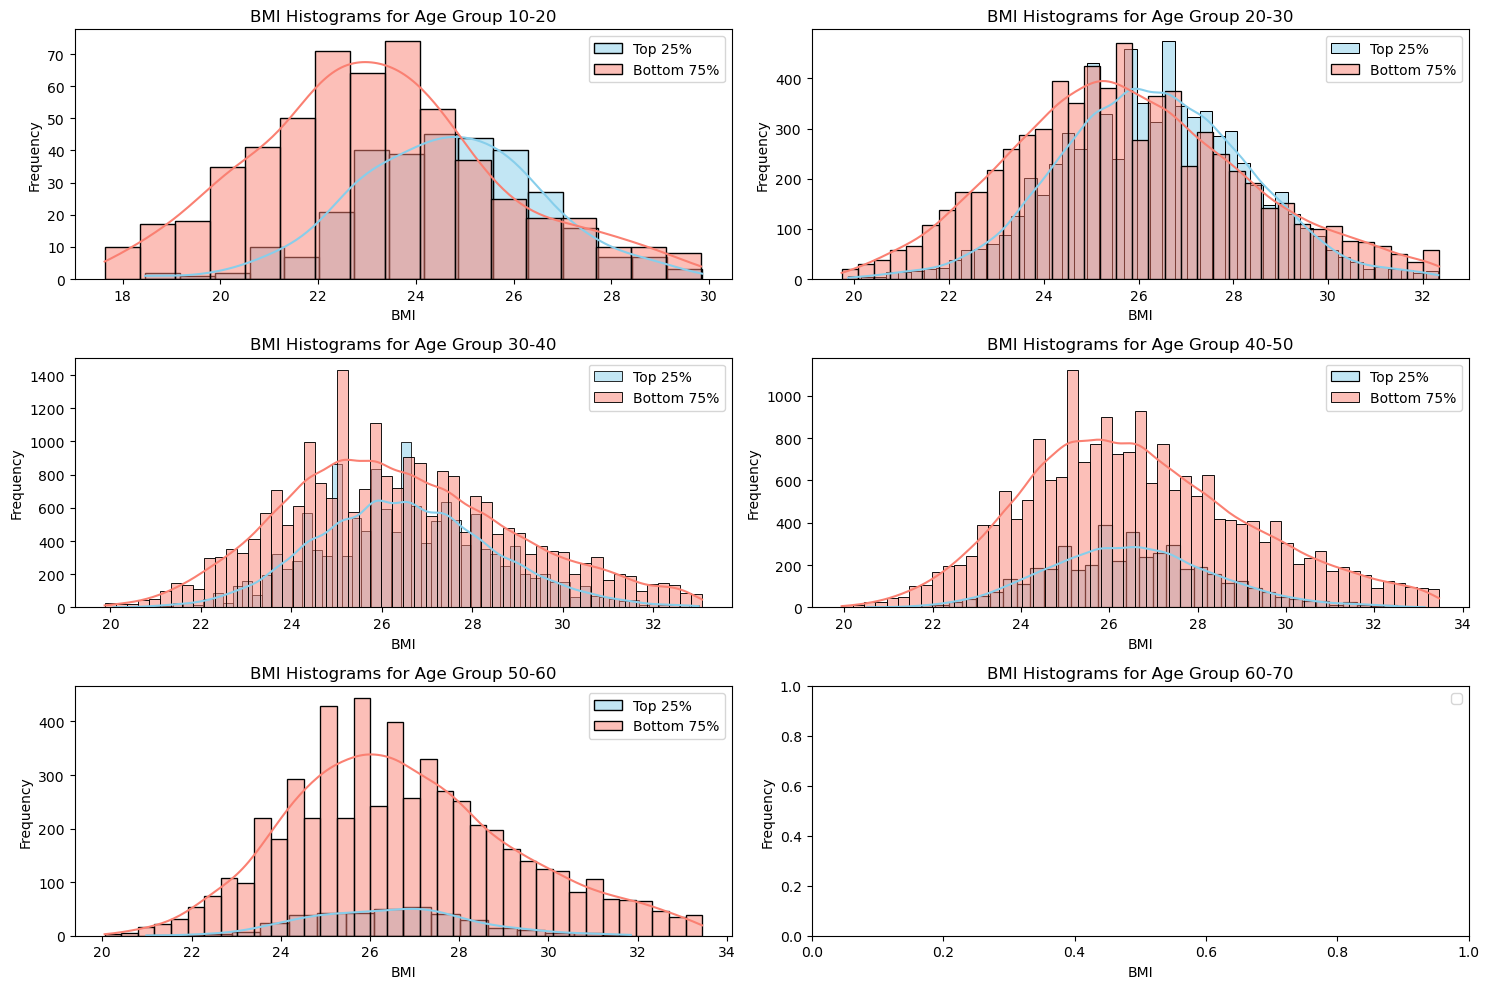

In [106]:
# Define age group ranges
age_groups = [(10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70)]

# Create a figure for the histograms
plt.figure(figsize=(15, 10))

# Iterate over each age group
for i, (start_age, end_age) in enumerate(age_groups, start=1):
    # Filter data for the current age group
    age_group_df = CrossFit_Men[(CrossFit_Men['Age (Years)'] >= start_age) & (CrossFit_Men['Age (Years)'] < end_age)]
    
    # Filter data for individuals categorized as "1s" and "0s" in the current age group
    top_25_df = age_group_df[age_group_df['Top 25%'] == 1]
    bottom_75_df = age_group_df[age_group_df['Top 25%'] == 0]
    
    # Remove outliers from BMI data using IQR method
    Q1 = age_group_df['BMI'].quantile(0.25)
    Q3 = age_group_df['BMI'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    top_25_no_outliers = top_25_df[(top_25_df['BMI'] >= lower_bound) & (top_25_df['BMI'] <= upper_bound)]
    bottom_75_no_outliers = bottom_75_df[(bottom_75_df['BMI'] >= lower_bound) & (bottom_75_df['BMI'] <= upper_bound)]
    
    # Perform t-test for BMI between the two groups
    t_stat, p_value = ttest_ind(top_25_no_outliers['BMI'], bottom_75_no_outliers['BMI'])
    print(f"T-Test for Age Group {start_age}-{end_age}:")
    print(f"T-statistic: {t_stat}, p-value: {p_value}\n")
    
    # Plot histograms for BMI of the two groups
    plt.subplot(3, 2, i)
    sns.histplot(top_25_no_outliers['BMI'], color='skyblue', label='Top 25%', kde=True)
    sns.histplot(bottom_75_no_outliers['BMI'], color='salmon', label='Bottom 75%', kde=True)
    plt.xlabel('BMI')
    plt.ylabel('Frequency')
    plt.title(f'BMI Histograms for Age Group {start_age}-{end_age}')
    plt.legend()

plt.tight_layout()
plt.show()

T-Test for Age Group 10-20:
T-statistic: 9.066574244854205, p-value: 7.987765977391786e-19

T-Test for Age Group 20-30:
T-statistic: 13.93825273921155, p-value: 7.208180229263012e-44

T-Test for Age Group 30-40:
T-statistic: 5.534590797224993, p-value: 3.1405560551624736e-08

T-Test for Age Group 40-50:
T-statistic: -2.9464718697814773, p-value: 0.0032172990245256474

T-Test for Age Group 50-60:
T-statistic: -2.172907119842262, p-value: 0.029826369002160277

T-Test for Age Group 60-70:
T-statistic: nan, p-value: nan



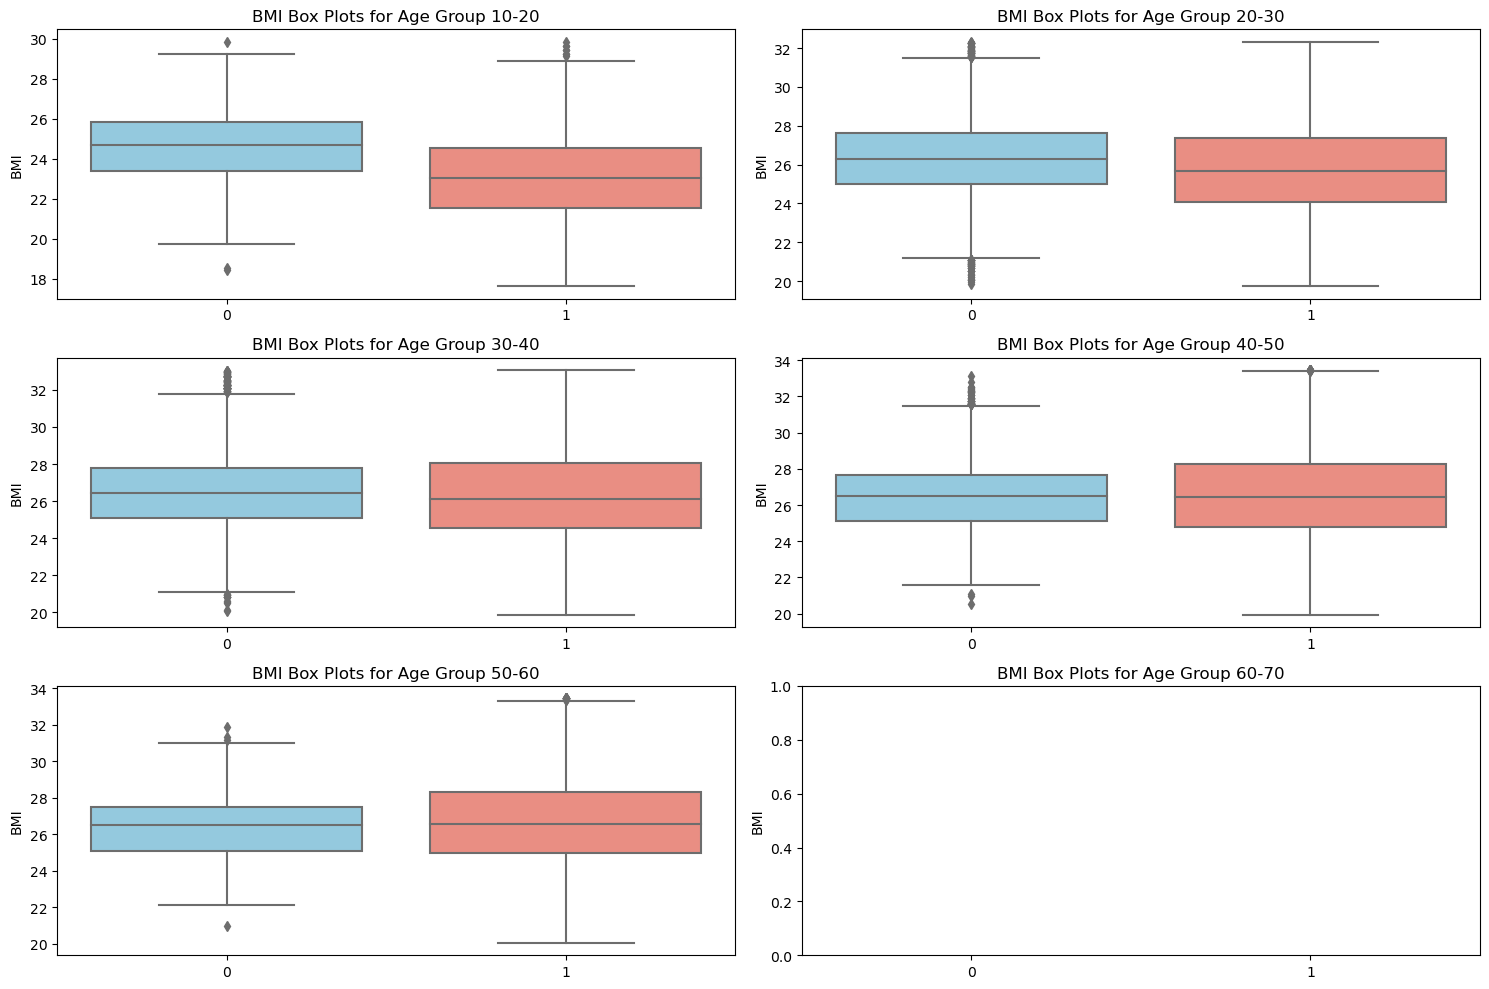

In [107]:
CrossFit_Women['Top 25%'] = CrossFit_Women['Overall Rank'].apply(lambda x: 1 if x < 41409 else 0)

# Calculate BMI
CrossFit_Women['BMI'] = (CrossFit_Women['Weight (lbs)'] / (CrossFit_Women['Height (in)'] ** 2)) * 703

# Define age group ranges
age_groups = [(10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70)]

# Create a figure for the box plots
plt.figure(figsize=(15, 10))

# Iterate over each age group
for i, (start_age, end_age) in enumerate(age_groups, start=1):
    # Filter data for the current age group
    age_group_df = CrossFit_Men[(CrossFit_Men['Age (Years)'] >= start_age) & (Crossfit_Men['Age (Years)'] < end_age)]
    
    # Filter data for individuals categorized as "1s" and "0s" in the current age group
    top_25_df = age_group_df[age_group_df['Top 25%'] == 1]
    bottom_75_df = age_group_df[age_group_df['Top 25%'] == 0]
    
    # Remove outliers from BMI data using IQR method
    Q1 = age_group_df['BMI'].quantile(0.25)
    Q3 = age_group_df['BMI'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    top_25_no_outliers = top_25_df[(top_25_df['BMI'] >= lower_bound) & (top_25_df['BMI'] <= upper_bound)]
    bottom_75_no_outliers = bottom_75_df[(bottom_75_df['BMI'] >= lower_bound) & (bottom_75_df['BMI'] <= upper_bound)]
    
    # Perform t-test for BMI between the two groups
    t_stat, p_value = ttest_ind(top_25_no_outliers['BMI'], bottom_75_no_outliers['BMI'])
    print(f"T-Test for Age Group {start_age}-{end_age}:")
    print(f"T-statistic: {t_stat}, p-value: {p_value}\n")
    
    # Plot box plots for BMI of the two groups
    plt.subplot(3, 2, i)
    sns.boxplot(data=[top_25_no_outliers['BMI'], bottom_75_no_outliers['BMI']], orient='v', palette=['skyblue', 'salmon'])
    plt.ylabel('BMI')
    plt.title(f'BMI Box Plots for Age Group {start_age}-{end_age}')

plt.tight_layout()
plt.show()

T-Test for Age Group 10-20:
T-statistic: 2.5192038186890886, p-value: 0.012082420152547737

T-Test for Age Group 20-30:
T-statistic: 0.7478265138562565, p-value: 0.45458870661442663

T-Test for Age Group 30-40:
T-statistic: -7.902693936256064, p-value: 2.8934679967040406e-15

T-Test for Age Group 40-50:
T-statistic: -10.750897611546119, p-value: 8.103700662956264e-27



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


T-Test for Age Group 50-60:
T-statistic: -4.757260338212081, p-value: 2.0785591356842912e-06

T-Test for Age Group 60-70:
T-statistic: nan, p-value: nan



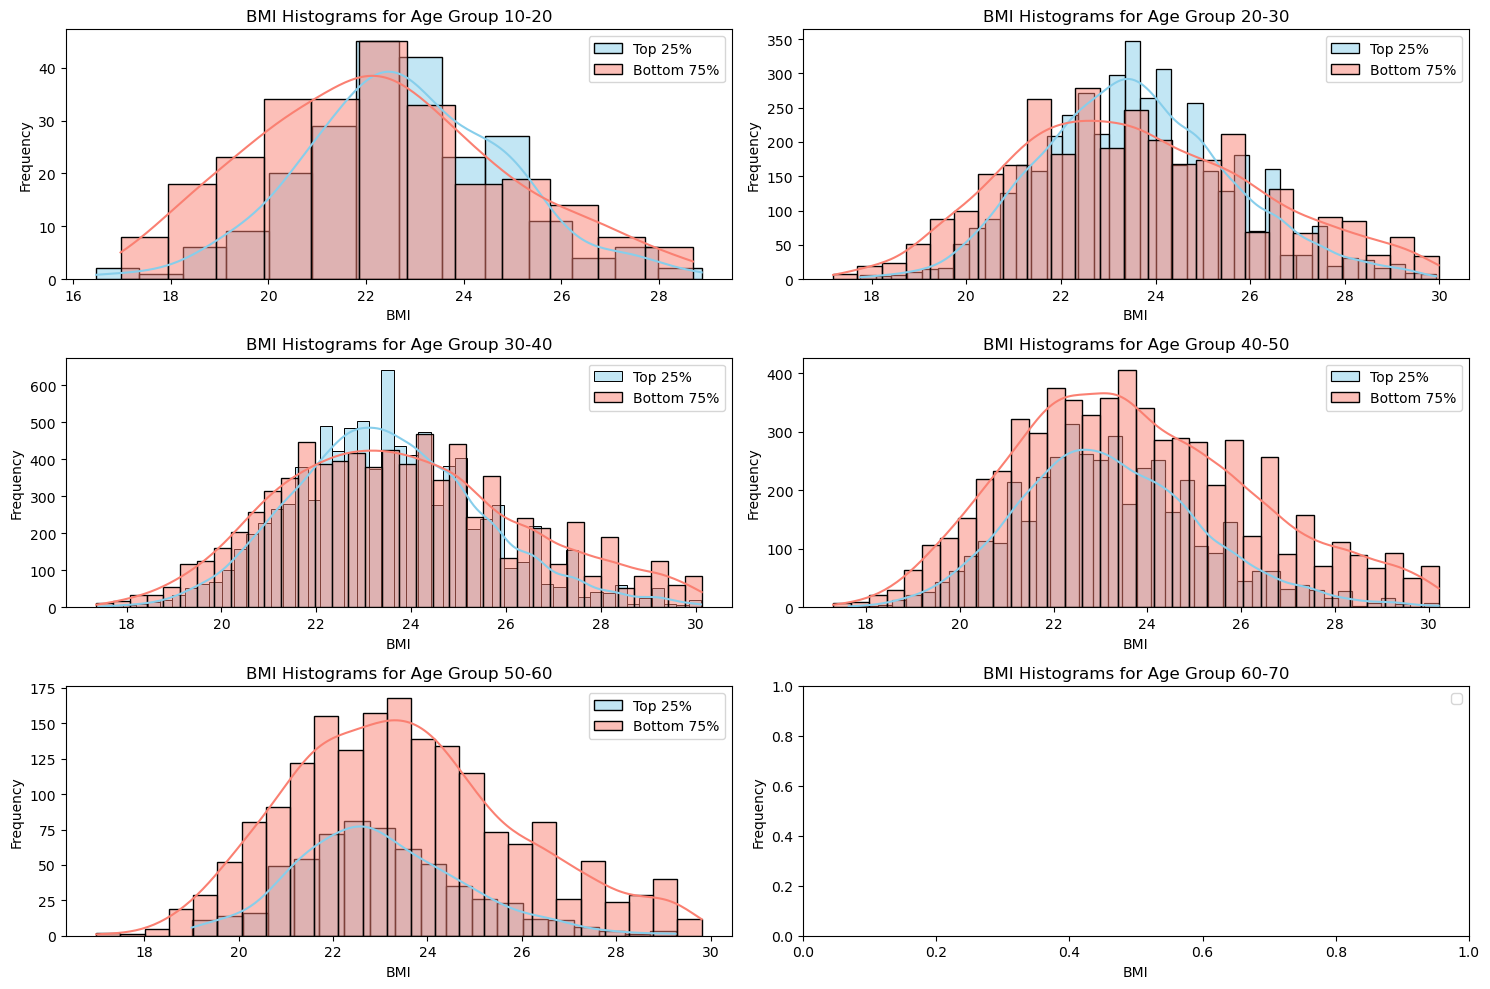

In [108]:
# Define age group ranges
age_groups = [(10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70)]

# Create a figure for the histograms
plt.figure(figsize=(15, 10))

# Iterate over each age group
for i, (start_age, end_age) in enumerate(age_groups, start=1):
    # Filter data for the current age group
    age_group_df = CrossFit_Women[(CrossFit_Women['Age (Years)'] >= start_age) & (Crossfit_Women['Age (Years)'] < end_age)]
    
    # Filter data for individuals categorized as "1s" and "0s" in the current age group
    top_25_df = age_group_df[age_group_df['Top 25%'] == 1]
    bottom_75_df = age_group_df[age_group_df['Top 25%'] == 0]
    
    # Remove outliers from BMI data using IQR method
    Q1 = age_group_df['BMI'].quantile(0.25)
    Q3 = age_group_df['BMI'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    top_25_no_outliers = top_25_df[(top_25_df['BMI'] >= lower_bound) & (top_25_df['BMI'] <= upper_bound)]
    bottom_75_no_outliers = bottom_75_df[(bottom_75_df['BMI'] >= lower_bound) & (bottom_75_df['BMI'] <= upper_bound)]
    
    # Perform t-test for BMI between the two groups
    t_stat, p_value = ttest_ind(top_25_no_outliers['BMI'], bottom_75_no_outliers['BMI'])
    print(f"T-Test for Age Group {start_age}-{end_age}:")
    print(f"T-statistic: {t_stat}, p-value: {p_value}\n")
    
    # Plot histograms for BMI of the two groups
    plt.subplot(3, 2, i)
    sns.histplot(top_25_no_outliers['BMI'], color='skyblue', label='Top 25%', kde=True)
    sns.histplot(bottom_75_no_outliers['BMI'], color='salmon', label='Bottom 75%', kde=True)
    plt.xlabel('BMI')
    plt.ylabel('Frequency')
    plt.title(f'BMI Histograms for Age Group {start_age}-{end_age}')
    plt.legend()

plt.tight_layout()
plt.show()

In [109]:
# Compute BMI for each individual
CrossFit_Men['BMI'] = (CrossFit_Men['Weight (lbs)'] / (CrossFit_Men['Height (in)'] ** 2)) * 703

# Round BMI to the nearest whole number
CrossFit_Men['BMI'] = CrossFit_Men['BMI'].round()

# Group BMI into ranges of five
CrossFit_Men['BMI Category'] = pd.cut(CrossFit_Men['BMI'], bins=np.arange(15, 55, 5), right=False)

# Define the benchmark exercises
benchmark_exercises = ['Back Squat (lbs)', 'Deadlift (lbs)', 'Clean and Jerk (lbs)', 
                       'Snatch (lbs)', 'Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                       'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 'Run 5k (sec)', 
                       'Sprint 400m (sec)']

# Drop rows with non-finite values from the BMI column
Crossfit_Men = CrossFit_Men.dropna(subset=['BMI'])

# Group by BMI category and calculate the mean result for each exercise and overall rank
BMI_category_grouped = Crossfit_Men.groupby('BMI Category')[['Overall Rank'] + benchmark_exercises].mean()

# Rank the BMI categories based on mean result for each exercise and overall rank
for exercise in benchmark_exercises:
    BMI_category_grouped[f'{exercise} Rank'] = BMI_category_grouped[exercise].rank(ascending=False).astype(int)

# Print the grouped DataFrame with ranked categories
print(BMI_category_grouped)

               Overall Rank  Back Squat (lbs)  Deadlift (lbs)  \
BMI Category                                                    
[15, 20)      117802.745856        233.199644      287.301576   
[20, 25)       80578.850058        278.585001      351.831853   
[25, 30)       67548.591561        338.977699      412.967848   
[30, 35)       93169.467065        371.028965      437.571493   
[35, 40)      124428.688618        379.610422      439.334797   
[40, 45)      140024.361386        381.612899      434.806823   
[45, 50)      149606.195652        357.501295      407.841105   

              Clean and Jerk (lbs)  Snatch (lbs)  Fight Gone Bad (# reps)  \
BMI Category                                                                
[15, 20)                164.747286    128.884815               265.900000   
[20, 25)                203.606562    155.937539               291.919096   
[25, 30)                241.939170    186.663111               312.576831   
[30, 35)                248.5

In [110]:
# Compute BMI for each individual
Crossfit_Men['BMI'] = (Crossfit_Men['Weight (lbs)'] / (Crossfit_Men['Height (in)'] ** 2)) * 703

# Round BMI to the nearest whole number
Crossfit_Men['BMI'] = Crossfit_Men['BMI'].round()

# Group BMI into ranges of five
Crossfit_Men['BMI Category'] = pd.cut(Crossfit_Men['BMI'], bins=np.arange(15, 55, 5), right=False)

# Define the benchmark exercises
benchmark_exercises = ['Back Squat (lbs)', 'Deadlift (lbs)', 'Clean and Jerk (lbs)', 
                       'Snatch (lbs)', 'Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                       'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 'Run 5k (sec)', 
                       'Sprint 400m (sec)']

# Drop rows with non-finite values from the BMI column
Crossfit_Men = Crossfit_Men.dropna(subset=['BMI'])

# Group by BMI category and calculate the mean result for each exercise and overall rank
BMI_category_grouped = Crossfit_Men.groupby('BMI Category')[['Overall Rank'] + benchmark_exercises].mean()

# Rank the BMI categories based on mean result for each exercise and overall rank
for exercise in benchmark_exercises:
    BMI_category_grouped[f'{exercise} Rank'] = BMI_category_grouped[exercise].rank(ascending=True).astype(int)

# Highlight the number one in each column
def highlight_number_one(val):
    if val == 1:
        return 'background-color: yellow'
    else:
        return ''

# Apply the highlighting function
BMI_category_highlighted = BMI_category_grouped.style.applymap(highlight_number_one)

# Display the styled DataFrame
BMI_category_highlighted

/var/folders/xm/kc32pwjj5fj5xqf43yb4dz340000gn/T/ipykernel_89055/1790597213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crossfit_Men['BMI'] = (Crossfit_Men['Weight (lbs)'] / (Crossfit_Men['Height (in)'] ** 2)) * 703
/var/folders/xm/kc32pwjj5fj5xqf43yb4dz340000gn/T/ipykernel_89055/1790597213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Crossfit_Men['BMI'] = Crossfit_Men['BMI'].round()
/var/folders/xm/kc32pwjj5fj5xqf43yb4dz340000gn/T/ipykernel_89055/1790597213.py:8: SettingWithCopyWarning: 
A v

,Overall Rank,Back Squat (lbs),Deadlift (lbs),Clean and Jerk (lbs),Snatch (lbs),Fight Gone Bad (# reps),Filthy 50 (sec),Fran (sec),Grace (sec),Helen (sec),Run 5k (sec),Sprint 400m (sec),Back Squat (lbs) Rank,Deadlift (lbs) Rank,Clean and Jerk (lbs) Rank,Snatch (lbs) Rank,Fight Gone Bad (# reps) Rank,Filthy 50 (sec) Rank,Fran (sec) Rank,Grace (sec) Rank,Helen (sec) Rank,Run 5k (sec) Rank,Sprint 400m (sec) Rank
BMI Category,,,,,,,,,,,,,,,,,,,,,,,
"[15, 20)",117802.745856,233.199644,287.301576,164.747286,128.884815,265.900000,1343.750000,413.736842,243.714286,656.428571,1406.379310,75.066667,1,1,1,1,3,2,6,6,3,3,3
"[20, 25)",80578.850058,278.585001,351.831853,203.606562,155.937539,291.919096,1554.209622,308.908856,244.047033,611.284061,1354.807846,73.314914,2,2,3,3,5,4,3,7,2,1,1
"[25, 30)",67548.591561,338.977699,412.967848,241.939170,186.663111,312.576831,1525.815464,259.806391,190.026649,597.836132,1394.680657,73.830105,3,4,6,6,7,3,1,2,1,2,2
"[30, 35)",93169.467065,371.028965,437.571493,248.529149,190.005973,300.441579,1664.471037,294.313940,179.080145,660.902181,1570.893110,82.067283,5,6,7,7,6,5,2,1,4,4,4
"[35, 40)",124428.688618,379.610422,439.334797,236.044380,180.622042,277.060150,1870.193548,371.601732,196.189964,758.947712,1792.663636,92.690722,6,7,5,5,4,6,4,3,5,5,5
"[40, 45)",140024.361386,381.612899,434.806823,224.844840,171.325973,237.300000,2276.333333,417.210526,214.678571,955.866667,2084.538462,126.200000,7,5,4,4,1,7,7,4,7,6,6
"[45, 50)",149606.195652,357.501295,407.841105,199.401350,155.423143,258.750000,1327.000000,381.250000,231.444444,807.000000,2661.333333,151.000000,4,3,2,2,2,1,5,5,6,7,7


In [111]:
# Compute BMI for each individual
Crossfit_Men['BMI'] = (Crossfit_Men['Weight (lbs)'] / (Crossfit_Men['Height (in)'] ** 2)) * 703

# Round BMI to the nearest whole number
Crossfit_Men['BMI'] = Crossfit_Men['BMI'].round()

# Group BMI into ranges of five
Crossfit_Men['BMI Category'] = pd.cut(Crossfit_Men['BMI'], bins=np.arange(10, 60, 5), right=False)

# Define the benchmark exercises
benchmark_exercises = ['Back Squat (lbs)', 'Deadlift (lbs)', 'Clean and Jerk (lbs)', 
                       'Snatch (lbs)', 'Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                       'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 'Run 5k (sec)', 
                       'Sprint 400m (sec)']

# Drop rows with non-finite values from the BMI column
Crossfit_Men = Crossfit_Men.dropna(subset=['BMI'])

# Replace non-finite values in benchmark exercise columns with a placeholder
Crossfit_Men[benchmark_exercises] = Crossfit_Men[benchmark_exercises].replace([np.inf, -np.inf], np.nan)

# Group by BMI category and calculate the mean result for each exercise and overall rank
BMI_category_grouped = Crossfit_Men.groupby('BMI Category')[['Overall Rank'] + benchmark_exercises].mean()

# Rank the BMI categories based on mean result for each exercise and overall rank
for exercise in benchmark_exercises:
    # Replace non-finite values with a large number to ensure they rank at the bottom
    BMI_category_grouped[f'{exercise} Rank'] = BMI_category_grouped[exercise].fillna(np.inf).rank(ascending=True).astype(int)

# Keep only the rank columns and drop the mean columns
BMI_category_ranked = BMI_category_grouped[[f'{exercise} Rank' for exercise in benchmark_exercises] + ['Overall Rank']]

# Highlight the number one in each column
def highlight_number_one(val):
    if val == 1:
        return 'background-color: yellow'
    else:
        return ''

# Apply the highlighting function
BMI_category_highlighted = BMI_category_ranked.style.applymap(highlight_number_one)

# Display the styled DataFrame
BMI_category_highlighted

,Back Squat (lbs) Rank,Deadlift (lbs) Rank,Clean and Jerk (lbs) Rank,Snatch (lbs) Rank,Fight Gone Bad (# reps) Rank,Filthy 50 (sec) Rank,Fran (sec) Rank,Grace (sec) Rank,Helen (sec) Rank,Run 5k (sec) Rank,Sprint 400m (sec) Rank,Overall Rank
BMI Category,,,,,,,,,,,,
"[10, 15)",4,4,5,4,9,5,4,9,3,4,4,89132.796064
"[15, 20)",1,1,2,1,3,2,7,7,4,3,3,117802.745856
"[20, 25)",2,3,4,3,6,4,3,8,2,1,1,80578.850058
"[25, 30)",5,6,8,8,8,3,1,2,1,2,2,67548.591561
"[30, 35)",7,8,9,9,7,6,2,1,5,5,5,93169.467065
"[35, 40)",8,9,7,7,5,7,5,3,6,6,6,124428.688618
"[40, 45)",9,7,6,6,1,8,8,4,9,7,7,140024.361386
"[45, 50)",6,5,3,2,2,1,6,6,7,9,8,149606.195652
"[50, 55)",3,2,1,5,4,9,9,5,8,8,9,135113.428571


In [112]:
# Compute BMI for each individual
Crossfit_Men['BMI'] = (Crossfit_Men['Weight (lbs)'] / (Crossfit_Men['Height (in)'] ** 2)) * 703

# Round BMI to the nearest whole number
Crossfit_Men['BMI'] = Crossfit_Men['BMI'].round()

# Group BMI into ranges of five
Crossfit_Men['BMI Category'] = pd.cut(Crossfit_Men['BMI'], bins=np.arange(15, 60, 5), right=False)

# Define the benchmark exercises
benchmark_exercises = ['Back Squat (lbs)', 'Deadlift (lbs)', 'Clean and Jerk (lbs)', 
                       'Snatch (lbs)', 'Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                       'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 'Run 5k (sec)', 
                       'Sprint 400m (sec)']

# Drop rows with non-finite values from the BMI column
Crossfit_Men = Crossfit_Men.dropna(subset=['BMI'])

# Replace non-finite values in benchmark exercise columns with a placeholder
Crossfit_Men[benchmark_exercises] = Crossfit_Men[benchmark_exercises].replace([np.inf, -np.inf], np.nan)

# Group by BMI category and calculate the mean result for each exercise and overall rank
BMI_category_grouped = Crossfit_Men.groupby('BMI Category')[['Overall Rank'] + benchmark_exercises].mean()

# Rank the BMI categories based on mean result for each exercise and overall rank
for column in ['Overall Rank'] + benchmark_exercises:
    # Replace non-finite values with a large number to ensure they rank at the bottom
    BMI_category_grouped[f'{column} Rank'] = BMI_category_grouped[column].fillna(np.inf).rank(ascending=True).astype(int)

# Keep only the rank columns and drop the mean columns
BMI_category_ranked = BMI_category_grouped[[f'{column} Rank' for column in ['Overall Rank'] + benchmark_exercises]]

# Highlight the number one in each column
def highlight_number_one(val):
    if val == 1:
        return 'background-color: yellow'
    else:
        return ''

# Apply the highlighting function
BMI_category_highlighted = BMI_category_ranked.style.applymap(highlight_number_one)

# Display the styled DataFrame
BMI_category_highlighted

,Overall Rank Rank,Back Squat (lbs) Rank,Deadlift (lbs) Rank,Clean and Jerk (lbs) Rank,Snatch (lbs) Rank,Fight Gone Bad (# reps) Rank,Filthy 50 (sec) Rank,Fran (sec) Rank,Grace (sec) Rank,Helen (sec) Rank,Run 5k (sec) Rank,Sprint 400m (sec) Rank
BMI Category,,,,,,,,,,,,
"[15, 20)",4,1,1,2,1,3,2,6,7,3,3,3
"[20, 25)",2,2,3,4,3,6,4,3,8,2,1,1
"[25, 30)",1,4,5,7,7,8,3,1,2,1,2,2
"[30, 35)",3,6,7,8,8,7,5,2,1,4,4,4
"[35, 40)",5,7,8,6,6,5,6,4,3,5,5,5
"[40, 45)",7,8,6,5,5,1,7,7,4,8,6,6
"[45, 50)",8,5,4,3,2,2,1,5,6,6,8,7
"[50, 55)",6,3,2,1,4,4,8,8,5,7,7,8


In [44]:
# Compute BMI for each individual
Crossfit_Men['BMI'] = (Crossfit_Men['Weight (lbs)'] / (Crossfit_Men['Height (in)'] ** 2)) * 703

# Round BMI to the nearest whole number
Crossfit_Men['BMI'] = Crossfit_Men['BMI'].round()

# Group BMI into ranges of five
Crossfit_Men['BMI Category'] = pd.cut(Crossfit_Men['BMI'], bins=np.arange(15, 45, 5), right=False)

# Define the benchmark exercises
benchmark_exercises = ['Back Squat (lbs)', 'Deadlift (lbs)', 'Clean and Jerk (lbs)', 
                       'Snatch (lbs)', 'Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                       'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 'Run 5k (sec)', 
                       'Sprint 400m (sec)']

# Drop rows with non-finite values from the BMI column
Crossfit_Men = Crossfit_Men.dropna(subset=['BMI'])

# Replace non-finite values in benchmark exercise columns with a placeholder
Crossfit_Men[benchmark_exercises] = Crossfit_Men[benchmark_exercises].replace([np.inf, -np.inf], np.nan)


# Group by BMI category and calculate the top 10% result for each exercise and overall rank
BMI_category_grouped = Crossfit_Men.groupby('BMI Category')[['Overall Rank'] + benchmark_exercises].quantile(0.90)

# Rank the BMI categories based on the top 10% result for each exercise and overall rank
for column in ['Overall Rank'] + benchmark_exercises:
    # Replace non-finite values with a large number to ensure they rank at the bottom
    BMI_category_grouped[f'{column} Rank'] = BMI_category_grouped[column].fillna(np.inf).rank(ascending=True).astype(int)

# Rename 'Overall Rank Rank' to '2024 Open Rank'
BMI_category_grouped.rename(columns={'Overall Rank Rank': '2024 Open Rank'}, inplace=True)

# Create a separate column that sums all the ranks and ranks the ones with lowest category rank
BMI_category_grouped['Sum of Ranks'] = BMI_category_grouped[[f'{column} Rank' for column in benchmark_exercises]].sum(axis=1)
BMI_category_grouped['Category Rank'] = BMI_category_grouped['Sum of Ranks'].rank(ascending=True).astype(int)

# Keep only the rank columns and drop the percentile columns
BMI_category_ranked = BMI_category_grouped[['Category Rank', '2024 Open Rank'] + [f'{column} Rank' for column in benchmark_exercises]]

# Highlight the number one in each column
def highlight_number_one(val):
    if val == 1:
        return 'background-color: yellow'
    else:
        return ''

# Apply the highlighting function
BMI_category_highlighted = BMI_category_ranked.style.applymap(highlight_number_one)

# Display the styled DataFrame
BMI_category_highlighted

,Category Rank,2024 Open Rank,Back Squat (lbs) Rank,Deadlift (lbs) Rank,Clean and Jerk (lbs) Rank,Snatch (lbs) Rank,Fight Gone Bad (# reps) Rank,Filthy 50 (sec) Rank,Fran (sec) Rank,Grace (sec) Rank,Helen (sec) Rank,Run 5k (sec) Rank,Sprint 400m (sec) Rank
BMI Category,,,,,,,,,,,,,
"[15, 20)",2,5,1,1,1,1,4,1,5,4,3,3,3
"[20, 25)",1,2,2,2,2,2,2,3,2,5,2,1,1
"[25, 30)",3,1,3,3,3,4,5,2,1,2,1,2,2
"[30, 35)",4,3,4,4,5,5,3,4,3,1,4,4,3
"[35, 40)",5,4,5,5,4,3,1,5,4,3,5,5,5


In [47]:
# Compute BMI for each individual
Crossfit_Men['BMI'] = (Crossfit_Men['Weight (lbs)'] / (Crossfit_Men['Height (in)'] ** 2)) * 703

# Round BMI to the nearest whole number
Crossfit_Men['BMI'] = Crossfit_Men['BMI'].round()

# Group BMI into ranges of five
Crossfit_Men['BMI Category'] = pd.cut(Crossfit_Men['BMI'], bins=np.arange(15, 45, 5), right=False)

# Define the benchmark exercises
benchmark_exercises = ['Back Squat (lbs)', 'Deadlift (lbs)', 'Clean and Jerk (lbs)', 
                       'Snatch (lbs)', 'Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                       'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 'Run 5k (sec)', 
                       'Sprint 400m (sec)']

# Drop rows with non-finite values from the BMI column
Crossfit_Men = Crossfit_Men.dropna(subset=['BMI'])

# Replace non-finite values in benchmark exercise columns with a placeholder
Crossfit_Men[benchmark_exercises] = Crossfit_Men[benchmark_exercises].replace([np.inf, -np.inf], np.nan)


# Group by BMI category and calculate the top 10% result for each exercise and overall rank
BMI_category_grouped = Crossfit_Men.groupby('BMI Category')[['Overall Rank'] + benchmark_exercises].quantile(0.90)

# Rank the BMI categories based on the top 10% result for each exercise and overall rank
for column in ['Overall Rank'] + benchmark_exercises:
    # Replace non-finite values with a large number to ensure they rank at the bottom
    if '(lbs)' in column or '(# reps)' in column:
        BMI_category_grouped[f'{column} Rank'] = BMI_category_grouped[column].fillna(-np.inf).rank(ascending=False).astype(int)
    elif '(sec)' in column:
        BMI_category_grouped[f'{column} Rank'] = BMI_category_grouped[column].fillna(np.inf).rank(ascending=True).astype(int)
    else:
        BMI_category_grouped[f'{column} Rank'] = BMI_category_grouped[column].fillna(np.inf).rank(ascending=True).astype(int)

# Rename 'Overall Rank Rank' to '2024 Open Rank'
BMI_category_grouped.rename(columns={'Overall Rank Rank': '2024 Open Rank'}, inplace=True)

# Create a separate column that sums all the ranks and ranks the ones with lowest category rank
BMI_category_grouped['Sum of Ranks'] = BMI_category_grouped[[f'{column} Rank' for column in benchmark_exercises]].sum(axis=1)
BMI_category_grouped['Category Rank'] = BMI_category_grouped['Sum of Ranks'].rank(ascending=True).astype(int)

# Keep only the rank columns and drop the percentile columns
BMI_category_ranked = BMI_category_grouped[['Category Rank', '2024 Open Rank'] + [f'{column} Rank' for column in benchmark_exercises]]

# Highlight the number one in each column
def highlight_number_one(val):
    if val == 1:
        return 'background-color: yellow'
    else:
        return ''

# Apply the highlighting function
BMI_category_highlighted = BMI_category_ranked.style.applymap(highlight_number_one)

# Display the styled DataFrame
BMI_category_highlighted

,Category Rank,2024 Open Rank,Back Squat (lbs) Rank,Deadlift (lbs) Rank,Clean and Jerk (lbs) Rank,Snatch (lbs) Rank,Fight Gone Bad (# reps) Rank,Filthy 50 (sec) Rank,Fran (sec) Rank,Grace (sec) Rank,Helen (sec) Rank,Run 5k (sec) Rank,Sprint 400m (sec) Rank
BMI Category,,,,,,,,,,,,,
"[15, 20)",5,5,5,5,5,5,2,1,5,4,3,3,3
"[20, 25)",3,2,4,4,4,4,4,3,2,5,2,1,1
"[25, 30)",1,1,3,3,3,2,1,2,1,2,1,2,2
"[30, 35)",2,3,2,2,1,1,3,4,3,1,4,4,3
"[35, 40)",4,4,1,1,2,3,5,5,4,3,5,5,5


In [48]:
Crossfit_Men.describe()

,Height (in),Age (Years),Weight (lbs),Overall Rank,24.1 Rank,24.2 Rank,24.3 Rank,2024 Rank,2023 Rank,2022 Rank,...,Snatch (lbs),Fight Gone Bad (# reps),Filthy 50 (sec),Fran (sec),Grace (sec),Helen (sec),L1 Benchmark (sec),Run 5k (sec),Sprint 400m (sec),BMI
count,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,85730.000000,60462.000000,47256.000000,...,41437.000000,9027.000000,5484.000000,22382.000000,17414.000000,13153.000000,511.000000,20205.000000,10232.000000,85730.000000
mean,70.319538,36.873405,187.229150,74605.673125,76877.150496,73650.941012,72945.343380,74605.673125,66635.461463,58934.345734,...,181.418648,307.005428,1551.094639,273.188589,195.797577,610.218581,352.866928,1412.008067,74.990227,26.580695
std,2.736710,7.933747,26.750603,48550.996917,48314.585072,47660.459890,45965.334692,48550.996917,45550.849290,41235.744441,...,43.293920,62.782621,375.746407,120.910374,99.187698,125.466295,179.575212,254.085871,23.438715,3.265114
min,50.000000,16.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,44.092400,1.000000,300.000000,107.000000,59.000000,300.000000,60.000000,600.000000,43.000000,8.000000
25%,69.000000,31.000000,172.000000,32596.000000,34695.000000,32335.000000,32222.000000,32596.000000,27112.250000,23437.250000,...,154.323400,269.000000,1288.750000,178.000000,135.000000,523.000000,254.000000,1240.000000,61.000000,25.000000
50%,70.000000,36.000000,185.000000,69406.000000,73498.000000,68051.000000,69112.000000,69406.000000,60191.500000,52368.000000,...,180.000000,308.000000,1501.500000,242.000000,173.000000,587.000000,307.000000,1370.000000,70.000000,26.000000
75%,72.000000,42.000000,201.000000,112987.750000,116355.000000,112425.000000,113559.000000,112987.750000,101996.500000,90134.000000,...,210.000000,347.000000,1762.000000,337.000000,229.000000,674.000000,395.000000,1523.000000,83.000000,28.000000
max,82.000000,54.000000,525.000000,165637.000000,160697.000000,154294.000000,142271.000000,165637.000000,157742.000000,144036.000000,...,425.000000,450.000000,3600.000000,900.000000,1800.000000,1800.000000,1800.000000,3600.000000,600.000000,94.000000


In [40]:
# Compute BMI for each individual
Crossfit_Men['BMI'] = (Crossfit_Men['Weight (lbs)'] / (Crossfit_Men['Height (in)'] ** 2)) * 703

# Round BMI to the nearest whole number
Crossfit_Men['BMI'] = Crossfit_Men['BMI'].round()

# Group BMI into ranges of five
Crossfit_Men['BMI Category'] = pd.cut(Crossfit_Men['BMI'], bins=np.arange(10, 60, 5), right=False)

# Define the benchmark exercises
benchmark_exercises = ['Back Squat (lbs)', 'Deadlift (lbs)', 'Clean and Jerk (lbs)', 
                       'Snatch (lbs)', 'Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                       'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 'Run 5k (sec)', 
                       'Sprint 400m (sec)']

# Drop rows with non-finite values from the BMI column
Crossfit_Men = Crossfit_Men.dropna(subset=['BMI'])

# Replace non-finite values in benchmark exercise columns with a placeholder
Crossfit_Men[benchmark_exercises] = Crossfit_Men[benchmark_exercises].replace([np.inf, -np.inf], np.nan)


# Group by BMI category and calculate the maximum result for each exercise and overall rank
BMI_category_grouped = Crossfit_Men.groupby('BMI Category')[['Overall Rank'] + benchmark_exercises].max()

# Rank the BMI categories based on maximum result for each exercise and overall rank
for column in ['Overall Rank'] + benchmark_exercises:
    # Replace non-finite values with a large number to ensure they rank at the bottom
    BMI_category_grouped[f'{column} Rank'] = BMI_category_grouped[column].fillna(np.inf).rank(ascending=True).astype(int)

# Rename 'Overall Rank Rank' to '2024 Open Rank'
BMI_category_grouped.rename(columns={'Overall Rank Rank': '2024 Open Rank'}, inplace=True)

# Create a separate column that sums all the ranks and ranks the ones with lowest category rank
BMI_category_grouped['Sum of Ranks'] = BMI_category_grouped[[f'{column} Rank' for column in benchmark_exercises]].sum(axis=1)
BMI_category_grouped['Category Rank'] = BMI_category_grouped['Sum of Ranks'].rank(ascending=True).astype(int)

# Keep only the rank columns and drop the percentile columns
BMI_category_ranked = BMI_category_grouped[['Category Rank', '2024 Open Rank'] + [f'{column} Rank' for column in benchmark_exercises]]

# Highlight the number one in each column
def highlight_number_one(val):
    if val == 1:
        return 'background-color: yellow'
    else:
        return ''

# Apply the highlighting function
BMI_category_highlighted = BMI_category_ranked.style.applymap(highlight_number_one)

# Display the styled DataFrame
BMI_category_highlighted

,Category Rank,2024 Open Rank,Back Squat (lbs) Rank,Deadlift (lbs) Rank,Clean and Jerk (lbs) Rank,Snatch (lbs) Rank,Fight Gone Bad (# reps) Rank,Filthy 50 (sec) Rank,Fran (sec) Rank,Grace (sec) Rank,Helen (sec) Rank,Run 5k (sec) Rank,Sprint 400m (sec) Rank
BMI Category,,,,,,,,,,,,,
"[10, 15)",4,5,3,3,4,4,4,3,4,4,1,4,1
"[15, 20)",3,5,2,2,3,3,5,2,3,3,3,1,1
"[20, 25)",7,5,5,6,8,5,8,7,8,7,8,7,8
"[25, 30)",9,5,7,8,6,9,8,7,8,8,7,7,9
"[30, 35)",8,5,7,8,9,7,7,6,8,8,8,7,6
"[35, 40)",6,5,7,8,7,8,6,4,6,6,5,7,5
"[40, 45)",5,5,7,5,5,5,3,5,5,5,6,5,6
"[45, 50)",2,5,4,4,2,2,2,1,1,2,2,3,4
"[50, 55)",1,5,1,1,1,1,1,9,2,1,4,2,3


In [ ]:
# Filter Male and Female BMI separately
male_bmi = CrossFit.loc[CrossFit['Gender'] == 'M', 'BMI']
female_bmi = CrossFit.loc[CrossFit['Gender'] == 'F', 'BMI']

# Check if there are any records in the male BMI dataframe
print("Number of records for Male BMI:", male_bmi.shape[0])

# Check if there are any records in the female BMI dataframe
print("Number of records for Female BMI:", female_bmi.shape[0])

Number of records for Male BMI: 176254
Number of records for Female BMI: 124927


In [ ]:
# Filter Male and Female BMI separately
male_bmi = CrossFit.loc[CrossFit['Gender'] == 'M', 'BMI']
female_bmi = CrossFit.loc[CrossFit['Gender'] == 'F', 'BMI']

# Summary statistics for Male BMI
male_bmi_summary = male_bmi.describe()

# Summary statistics for Female BMI
female_bmi_summary = female_bmi.describe()

# Create DataFrames for Male and Female BMI summary statistics
male_summary_df = pd.DataFrame(male_bmi_summary, columns=['Male BMI'])
female_summary_df = pd.DataFrame(female_bmi_summary, columns=['Female BMI'])

# Print summary statistics for Male BMI
print("Summary statistics for Male BMI:")
print(male_summary_df)

# Print summary statistics for Female BMI
print("\nSummary statistics for Female BMI:")
print(male_bmi.describe())

Summary statistics for Male BMI:
Empty DataFrame
Columns: [Male BMI]
Index: []

Summary statistics for Female BMI:
count    85729.000000
mean        26.584841
std          3.248896
min          8.238281
25%         24.781076
50%         26.317568
75%         28.120000
max         93.850125
Name: BMI, dtype: float64


In [ ]:
# Selecting the columns of interest
summary_df = CrossFit[['Gender', 'Age (Years)', 'Weight (lbs)', 'Height (in)', 'BMI']]

# Grouping the data by gender
grouped = summary_df.groupby('Gender')

# Creating individual dataframes for each column and gender
age_stats = grouped['Age (Years)'].describe()
weight_stats = grouped['Weight (lbs)'].describe()
height_stats = grouped['Height (in)'].describe()
bmi_stats = grouped['BMI'].describe()

# Custom function to format the statistics with commas for thousands separators
def format_with_commas(x):
    if isinstance(x, (int, float)):
        return "{:,.0f}".format(x)
    else:
        return x

# Applying the custom formatting function to the descriptive statistics dataframes
age_stats = age_stats.applymap(format_with_commas)
weight_stats = weight_stats.applymap(format_with_commas)
height_stats = height_stats.applymap(format_with_commas)
bmi_stats = bmi_stats.applymap(format_with_commas)

# Moving count and mean down one line
age_stats = age_stats.rename(index={'count': '', 'mean': 'count'}, inplace=False)
weight_stats = weight_stats.rename(index={'count': '', 'mean': 'count'}, inplace=False)
height_stats = height_stats.rename(index={'count': '', 'mean': 'count'}, inplace=False)
bmi_stats = bmi_stats.rename(index={'count': '', 'mean': 'count'}, inplace=False)

# Print summary statistics for Age
print("Summary statistics for Age:")
print(age_stats)

# Print summary statistics for Weight
print("\nSummary statistics for Weight:")
print(weight_stats)

# Print summary statistics for Height
print("\nSummary statistics for Height:")
print(height_stats)

# Print summary statistics for BMI
print("\nSummary statistics for BMI:")
print(bmi_stats)

Summary statistics for Age:
          count mean std min 25% 50% 75% max
Gender                                      
F       124,927   35   8  16  29  34  41  54
M       176,254   36   8  16  30  35  41  54

Summary statistics for Weight:
         count mean std min  25%  50%  75%  max
Gender                                         
F       42,627  142  22  50  130  140  154  408
M       89,450  187  27  54  170  185  201  525

Summary statistics for Height:
         count mean std min 25% 50% 75% max
Gender                                     
F       47,057   65   3  48  63  65  67  77
M       89,673   70   3  50  69  70  72  82

Summary statistics for BMI:
         count mean std min 25% 50% 75% max
Gender                                     
F       39,780   24   3   7  22  23  25  71
M       85,729   27   3   8  25  26  28  94


In [ ]:
bmi_stats

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,"39,780",24,3,7,22,23,25,71
M,"85,729",27,3,8,25,26,28,94


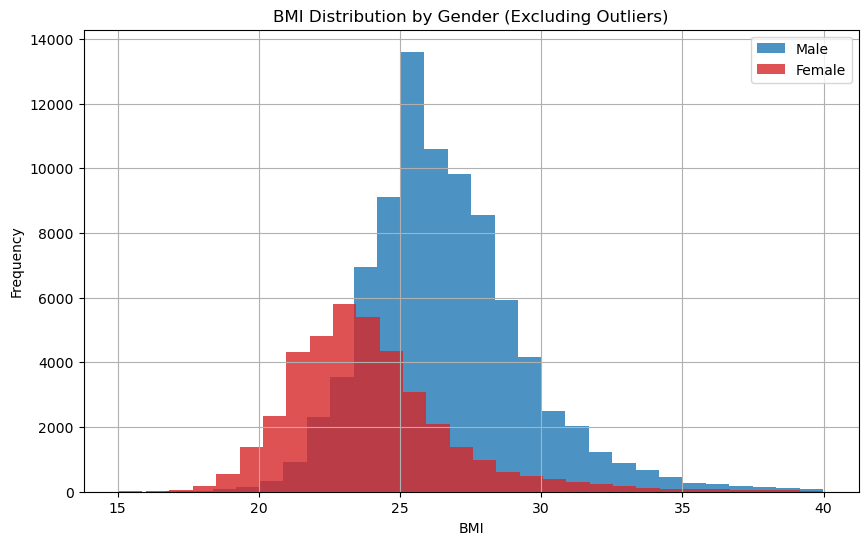

In [ ]:
# Define BMI range for filtering outliers
lower_bound = 15  # Example lower bound for BMI
upper_bound = 40  # Example upper bound for BMI

# Filter out BMI values outside the defined range for males and females
male_bmi_filtered = CrossFit[(CrossFit['Gender'] == 'M') & (CrossFit['BMI'] >= lower_bound) & (CrossFit['BMI'] <= upper_bound)]['BMI']
female_bmi_filtered = CrossFit[(CrossFit['Gender'] == 'F') & (CrossFit['BMI'] >= lower_bound) & (CrossFit['BMI'] <= upper_bound)]['BMI']

# Define colors
male_color = 'tab:blue'
female_color = 'tab:red'

# Plotting histograms for BMI comparing male and female
plt.figure(figsize=(10, 6))

# Histogram for Male BMI
plt.hist(male_bmi_filtered, bins=30, alpha=0.8, label='Male', color=male_color)

# Histogram for Female BMI
plt.hist(female_bmi_filtered, bins=30, alpha=0.8, label='Female', color=female_color)

# Set title and labels
plt.title('BMI Distribution by Gender (Excluding Outliers)')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Add legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()

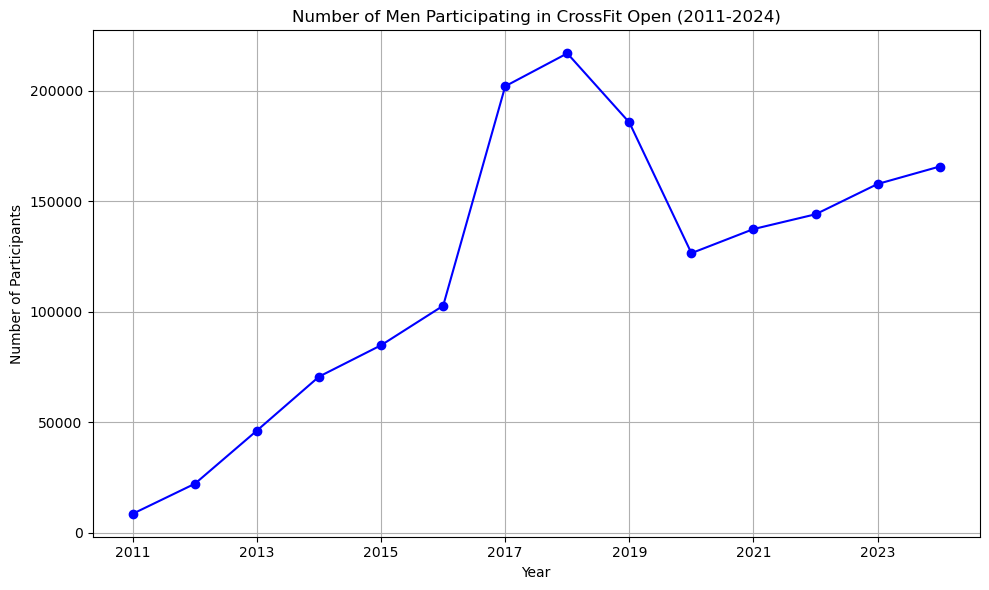

In [ ]:
years = list(range(2011, 2025))
participants = [
    8620, 22183, 46240, 70623, 84816, 102681, 201955, 216825, 
    185551, 126461, 137351, 144036, 157742, 165637
]

plt.figure(figsize=(10, 6))
plt.plot(years, participants, marker='o', color='b', linestyle='-')
plt.title('Number of Men Participating in CrossFit Open (2011-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.grid(True)
plt.xticks(range(2011, 2025, 2))
plt.tight_layout()
plt.show()

In [ ]:
Crossfit_Men.columns

Index(['Athlete ID', 'Gender', 'Competitor Name', 'Country Name',
       'Region Name', 'Affiliate Name', 'Height (in)', 'Age (Years)',
       'Weight (lbs)', 'Overall Rank', '24.1 Rank', '24.2 Rank', '24.3 Rank',
       '2024 Rank', '2023 Rank', '2022 Rank', '2021 Rank', '2020 Rank',
       '2019 Rank', '2018 Rank', '2017 Rank', '2016 Rank', '2015 Rank',
       '2014 Rank', '2013 Rank', '2012 Rank', '2011 Rank', 'Back Squat (lbs)',
       'Deadlift (lbs)', 'Clean and Jerk (lbs)', 'Snatch (lbs)',
       'Fight Gone Bad (# reps)', 'Filthy 50 (time)', 'Filthy 50 (sec)',
       'Fran (time)', 'Fran (sec)', 'Grace (time)', 'Grace (sec)',
       'Helen (time)', 'Helen (sec)', 'L1 Benchmark (time)',
       'L1 Benchmark (sec)', 'Run 5k (time)', 'Run 5k (sec)',
       'Sprint 400m (time)', 'Sprint 400m (sec)', 'Top 25%', 'BMI',
       'BMI Category'],
      dtype='object')

In [ ]:
# Define the dictionary mapping year to the number of participants
participants_data = {
    2011: 8620,
    2012: 22183,
    2013: 46240,
    2014: 70623,
    2015: 84816,
    2016: 102681,
    2017: 201955,
    2018: 216825,
    2019: 185551,
    2020: 126461,
    2021: 137351,
    2022: 144036,
    2023: 157742,
    2024: 165637
}

# Assuming Crossfit_Men is your DataFrame
year_columns = ['2024 Rank', '2023 Rank', '2022 Rank', '2021 Rank', '2020 Rank',
                '2019 Rank', '2018 Rank', '2017 Rank', '2016 Rank', '2015 Rank',
                '2014 Rank', '2013 Rank', '2012 Rank', '2011 Rank']

# Calculate the percent rank for each year
for column in year_columns:
    if column.endswith('Rank'):
        year = int(column.split()[0])  # Extract the year from the column name
        rank_col = column
        total_participants = participants_data[year]  # Get the total participants for the year from the dictionary
        percent_rank_col = f'{year} Percent Rank'
        Crossfit_Men[percent_rank_col] = 1 - (Crossfit_Men[rank_col] / total_participants)

# Set display options to show the entire DataFrame
pd.set_option('display.max_columns', None)  # Display all columns without truncation
pd.set_option('display.expand_frame_repr', False)  # Allow scrolling across columns

# Display the DataFrame using .head()
print(Crossfit_Men.head())

  Athlete ID Gender Competitor Name   Country Name         Region Name        Affiliate Name  Height (in)  Age (Years)  Weight (lbs)  Overall Rank  24.1 Rank  24.2 Rank  24.3 Rank  2024 Rank  2023 Rank  2022 Rank  2021 Rank  2020 Rank  2019 Rank  2018 Rank  2017 Rank  2016 Rank  2015 Rank  2014 Rank  2013 Rank  2012 Rank  2011 Rank  Back Squat (lbs)  Deadlift (lbs)  Clean and Jerk (lbs)  Snatch (lbs)  Fight Gone Bad (# reps) Filthy 50 (time)  Filthy 50 (sec) Fran (time)  Fran (sec) Grace (time)  Grace (sec) Helen (time)  Helen (sec) L1 Benchmark (time)  L1 Benchmark (sec) Run 5k (time)  Run 5k (sec) Sprint 400m (time)  Sprint 400m (sec)  Top 25%   BMI BMI Category  2024 Percent Rank  2023 Percent Rank  2022 Percent Rank  2021 Percent Rank  2020 Percent Rank  2019 Percent Rank  2018 Percent Rank  2017 Percent Rank  2016 Percent Rank  2015 Percent Rank  2014 Percent Rank  2013 Percent Rank  2012 Percent Rank  2011 Percent Rank
0      10942      M   Everett Sloan         Canada  North Ame

In [ ]:
# List of columns corresponding to the years
year_columns = ['2024 Percent Rank', '2023 Percent Rank', '2022 Percent Rank', '2021 Percent Rank', '2020 Percent Rank',
                '2019 Percent Rank', '2018 Percent Rank', '2017 Percent Rank', '2016 Percent Rank', '2015 Percent Rank',
                '2014 Percent Rank', '2013 Percent Rank', '2012 Percent Rank', '2011 Percent Rank']

# Initialize an empty list to store data for all athletes
all_data = []

# Iterate over each row (athlete) in the DataFrame
for index, row in Crossfit_Men.iterrows():
    athlete_id = row['Athlete ID']
    
    # Initialize a dictionary to store the data for the athlete
    athlete_data = {'Athlete ID': athlete_id}
    
    # Iterate over each year (column) to calculate percent change
    for i in range(len(year_columns) - 1):
        curr_year_col = year_columns[i]
        next_year_col = year_columns[i + 1]
        
        # Check if both years have data for the athlete
        if not pd.isnull(row[curr_year_col]) and not pd.isnull(row[next_year_col]):
            # Calculate percent change from current year to next year
            change = row[next_year_col] - row[curr_year_col]
            athlete_data[f'{year_columns[i].split()[0]}-{year_columns[i+1].split()[0]}'] = change
        else:
            # If any year is missing, insert NaN
            athlete_data[f'{year_columns[i].split()[0]}-{year_columns[i+1].split()[0]}'] = np.nan
    
    # Append the data for the athlete to the list
    all_data.append(athlete_data)

# Create a DataFrame from the list of dictionaries
change_df = pd.DataFrame(all_data)

# Print the DataFrame containing the change in percent rank
change_df.head()

,Athlete ID,2024-2023,2023-2022,2022-2021,2021-2020,2020-2019,2019-2018,2018-2017,2017-2016,2016-2015,2015-2014,2014-2013,2013-2012,2012-2011
0,10942,0.020032,0.395993,NaN,NaN,0.654003,0.256297,-0.010833,0.015765,0.028964,0.006372,0.019760,-0.116522,-0.439770
1,10926,0.020909,-0.010063,0.052227,0.004472,0.042174,0.031673,0.014135,-0.052492,-0.015146,-0.000444,0.028419,-0.073568,NaN
2,10976,0.081072,0.078784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10977,0.000000,0.393068,0.193596,0.011591,0.169797,0.120110,-0.305524,NaN,NaN,NaN,0.682701,-0.020996,NaN
4,10966,0.046150,-0.066432,0.107285,0.099880,-0.011893,-0.023175,-0.063665,-0.177139,0.107750,0.067920,-0.004776,0.022232,0.026706


In [ ]:
# List of columns corresponding to the years
year_columns = ['2024 Percent Rank', '2023 Percent Rank', '2022 Percent Rank', '2021 Percent Rank', '2020 Percent Rank',
                '2019 Percent Rank', '2018 Percent Rank', '2017 Percent Rank', '2016 Percent Rank', '2015 Percent Rank',
                '2014 Percent Rank', '2013 Percent Rank', '2012 Percent Rank', '2011 Percent Rank']

# Initialize an empty list to store data for all athletes
all_data = []

# Iterate over each row (athlete) in the DataFrame
for index, row in Crossfit_Men.iterrows():
    athlete_id = row['Athlete ID']
    
    # Initialize a dictionary to store the data for the athlete
    athlete_data = {'Athlete ID': athlete_id}
    
    # Find the index of the first non-null data point for the athlete
    first_non_null_index = next((i for i, col in enumerate(year_columns) if not pd.isnull(row[col])), None)
    
    # If the first non-null data point is found
    if first_non_null_index is not None:
        # Iterate over each year (column) to calculate percent change
        for i in range(first_non_null_index, len(year_columns) - 1):
            curr_year_col = year_columns[i]
            next_year_col = year_columns[i + 1]
            
            # Check if both years have data for the athlete
            if not pd.isnull(row[curr_year_col]) and not pd.isnull(row[next_year_col]):
                # Calculate percent change from current year to next year
                change = row[next_year_col] - row[curr_year_col]
                athlete_data[f'{i+1}-{i+2}'] = change
            else:
                # If any year is missing, insert NaN
                athlete_data[f'{i+1}-{i+2}'] = np.nan
    
        # Append the data for the athlete to the list
        all_data.append(athlete_data)

# Create a DataFrame from the list of dictionaries
change_df = pd.DataFrame(all_data)

# Print the DataFrame containing the change in percent rank
change_df.head()

,Athlete ID,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-14
0,10942,0.020032,0.395993,NaN,NaN,0.654003,0.256297,-0.010833,0.015765,0.028964,0.006372,0.019760,-0.116522,-0.439770
1,10926,0.020909,-0.010063,0.052227,0.004472,0.042174,0.031673,0.014135,-0.052492,-0.015146,-0.000444,0.028419,-0.073568,NaN
2,10976,0.081072,0.078784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10977,0.000000,0.393068,0.193596,0.011591,0.169797,0.120110,-0.305524,NaN,NaN,NaN,0.682701,-0.020996,NaN
4,10966,0.046150,-0.066432,0.107285,0.099880,-0.011893,-0.023175,-0.063665,-0.177139,0.107750,0.067920,-0.004776,0.022232,0.026706


In [ ]:
change_df.describe()

,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11,11-12,12-13,13-14
count,60462.000000,41342.000000,31568.000000,22534.000000,23584.000000,24144.000000,21488.000000,12744.000000,7820.000000,5507.000000,3393.000000,1690.000000,619.000000
mean,-0.015721,-0.030812,0.019152,-0.047423,0.013215,-0.035102,-0.045013,-0.104624,-0.072297,-0.087811,-0.086145,-0.121510,-0.133692
std,0.198199,0.192798,0.214452,0.226085,0.193018,0.199542,0.201053,0.194475,0.129419,0.138463,0.143768,0.160554,0.179303
min,-0.999143,-0.999968,-0.987584,-0.999818,-0.998909,-0.997602,-0.999410,-0.854334,-0.807342,-0.840196,-0.872099,-0.829879,-0.864585
25%,-0.094701,-0.099227,-0.053748,-0.129679,-0.046808,-0.112388,-0.109655,-0.212634,-0.135548,-0.162526,-0.159542,-0.212979,-0.237511
50%,-0.012240,-0.017982,0.010560,-0.020950,0.006077,-0.025094,-0.018169,-0.100771,-0.045236,-0.057439,-0.055208,-0.090582,-0.113562
75%,0.054531,0.038206,0.098809,0.032207,0.065968,0.021762,0.021236,-0.018987,0.001276,-0.000279,-0.002222,-0.013623,-0.026097
max,0.999994,0.999028,0.999410,0.991163,0.995974,0.999829,0.998346,0.998919,0.849872,0.624857,0.699382,0.916094,0.813730


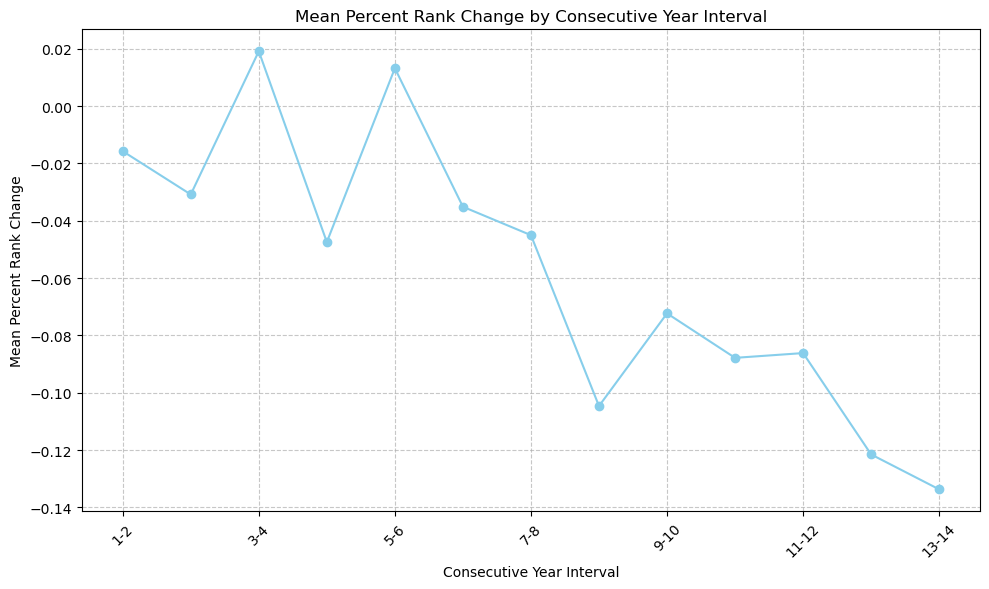

In [ ]:
# Plot the means as a line chart
plt.figure(figsize=(10, 6))
means.plot(kind='line', marker='o', color='skyblue')
plt.title('Mean Percent Rank Change by Consecutive Year Interval')
plt.xlabel('Consecutive Year Interval')
plt.ylabel('Mean Percent Rank Change')
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

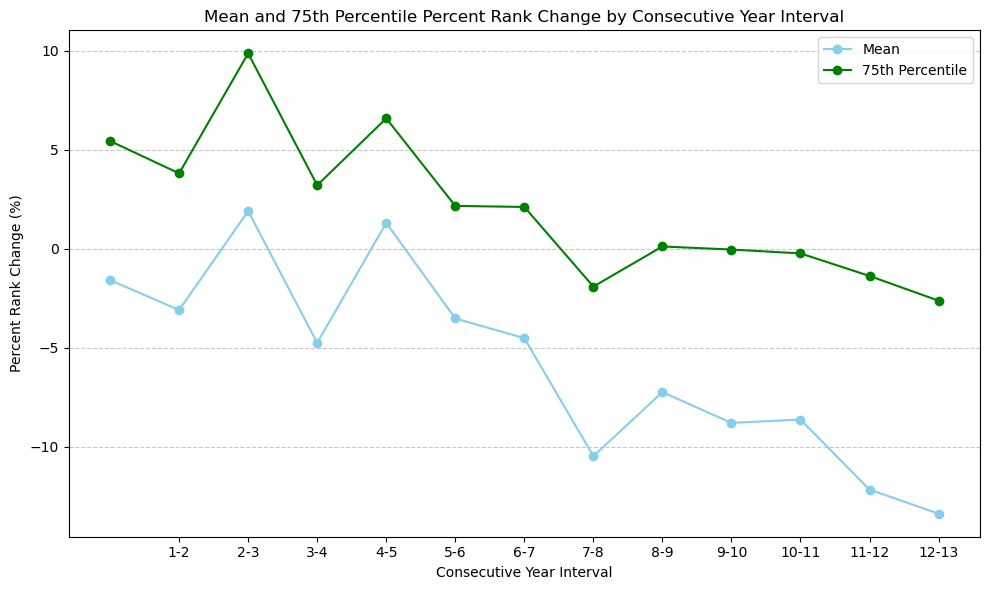

In [ ]:
# Plot the means as a line chart
plt.figure(figsize=(10, 6))
means.plot(kind='line', marker='o', color='skyblue', label='Mean')
percentile_75.plot(kind='line', marker='o', color='green', label='75th Percentile')
plt.title('Mean and 75th Percentile Percent Rank Change by Consecutive Year Interval')
plt.xlabel('Consecutive Year Interval')
plt.ylabel('Percent Rank Change (%)')
plt.xticks(range(1, len(means)), [f"{i}-{i+1}" for i in range(1, len(means))])  # Set custom x-axis labels excluding 13-14
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the 75th percentile for each consecutive year interval
percentile_75 = change_df.quantile(0.75)

# Plot the 75th percentile interval increase
plt.figure(figsize=(10, 6))
percentile_75.plot(kind='line', marker='o', color='green')
plt.title('75th Percentile Interval Increase by Consecutive Year Interval')
plt.xlabel('Consecutive Year Interval')
plt.ylabel('75th Percentile Interval Increase')
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85730 entries, 0 to 85729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete ID  85730 non-null  object 
 1   2024-2023   60462 non-null  float64
 2   2023-2022   41342 non-null  float64
 3   2022-2021   31568 non-null  float64
 4   2021-2020   22534 non-null  float64
 5   2020-2019   23584 non-null  float64
 6   2019-2018   24144 non-null  float64
 7   2018-2017   21488 non-null  float64
 8   2017-2016   12744 non-null  float64
 9   2016-2015   7820 non-null   float64
 10  2015-2014   5507 non-null   float64
 11  2014-2013   3393 non-null   float64
 12  2013-2012   1690 non-null   float64
 13  2012-2011   619 non-null    float64
dtypes: float64(13), object(1)
memory usage: 9.2+ MB


In [ ]:
# Assuming change_df is your DataFrame
change_df_numeric = change_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
change_df_numeric = change_df_numeric.dropna()

# Define the number of years you have data for
num_years = 12

# Create empty lists to store min, max, and mean values for each year
min_values = []
max_values = []
mean_values = []

# Iterate over each year
for i in range(num_years):
    # Calculate percent change for each year
    percent_change = change_df_numeric.iloc[:, i+1] - change_df_numeric.iloc[:, i]
    
    # Calculate min, max, and mean percent change for the current year
    min_change = np.nanmin(percent_change)
    max_change = np.nanmax(percent_change)
    mean_change = np.nanmean(percent_change)
    
    # Append the values to respective lists
    min_values.append(min_change)
    max_values.append(max_change)
    mean_values.append(mean_change)

# Print the results
for year, min_val, max_val, mean_val in zip(range(1, num_years+1), min_values, max_values, mean_values):
    print(f"For year {year} to year {year+1}:")
    print(f"Minimum percent change: {min_val}")
    print(f"Maximum percent change: {max_val}")
    print(f"Mean percent change: {mean_val}")
    print()

For year 1 to year 2:
Minimum percent change: -59394.94588708494
Maximum percent change: -86.0268026216283
Mean percent change: -17323.23317301716

For year 2 to year 3:
Minimum percent change: -1.433207798239953
Maximum percent change: 1.9635849447259492
Mean percent change: -0.05965771083593896

For year 3 to year 4:
Minimum percent change: -1.0116724430280608
Maximum percent change: 1.8070376976598213
Mean percent change: 0.07132041996276957

For year 4 to year 5:
Minimum percent change: -1.664154063358191
Maximum percent change: 1.2317029004592122
Mean percent change: -0.030164269491875433

For year 5 to year 6:
Minimum percent change: -0.8704254301627035
Maximum percent change: 1.8666503706688342
Mean percent change: 0.011989602126554524

For year 6 to year 7:
Minimum percent change: -1.0031911200363988
Maximum percent change: 1.3710298486832888
Mean percent change: -0.02844690389153555

For year 7 to year 8:
Minimum percent change: -0.964162872075412
Maximum percent change: 1.994

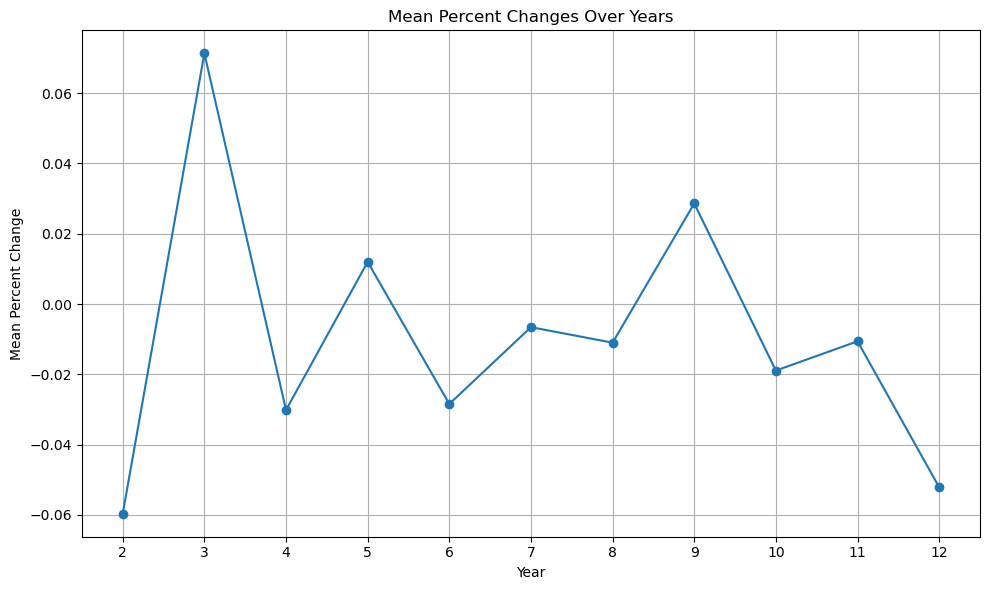

In [ ]:
# Define the years for which you have data (excluding the first year)
years = range(2, num_years+1)

# Plot the mean changes
plt.figure(figsize=(10, 6))
plt.plot(years, mean_values[1:], marker='o', linestyle='-')  # Exclude the first year
plt.title('Mean Percent Changes Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Percent Change')
plt.grid(True)
plt.xticks(years)
plt.tight_layout()
plt.show()